In [1]:
### Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
pd.set_option('display.max_colwidth',-1)
#Set dataframe cloumns width to max
pd.set_option('display.max_columns', None)
# set seaborn theme if you prefer
sns.set(style="white")

In [2]:
master_data=pd.read_excel(r'train.xlsx',sheet_name='Sheet1')

In [3]:
master_data.head(5)

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0  train      203097  420000  2012-06-01  present               
1  train      579905  500000  2013-09-01  present               
2  train      810601  325000  2014-06-01  present               
3  train      267447  1100000 2011-07-01  present               
4  train      343523  200000  2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  \
0  senior quality engineer   Bangalore  f     1990-02-19  84.3           
1  assistant manager         Indore     m     1989-10-04  85.4           
2  systems engineer          Chennai    f     1992-08-03  85.0           
3  senior software engineer  Gurgaon    m     1989-12-05  85.6           
4  get                       Manesar    m     1991-02-27  78.0           

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap  2007          95.8           
1  cbse                            2007          85.0           
2  cbse                            2010          68.2           
3  cbse                            2007          83.6           
4  cbse                            2008          76.8           

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap  1141       2            B.Tech/B.E.   
1  cbse                                5807       2            B.Tech/B.E.   
2  cbse                                64         2            B.Tech/B.E.   
3  cbse                                6920       1            B.Tech/B.E.   
4  cbse                                11368      2            B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0  computer engineering                       78.00       1141            
1  electronics and communication engineering  70.06       5807            
2  information technology                     70.00       64              
3  computer engineering                       74.64       6920            
4  electronics and communication engineering  73.90       11368           

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0  0                Andhra Pradesh  2011            515      585      525     
1  0                Madhya Pradesh  2012            695      610      780     
2  0                Uttar Pradesh   2014            615      545      370     
3  1                Delhi           2011            635      585      625     
4  0                Uttar Pradesh   2012            545      625      465     

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979  445                 -1                     -1                 
1  0.960603 -1                    466                   -1                 
2  0.450877  395                 -1                     -1                 
3  0.974396  615                 -1                     -1                 
4  0.124502 -1                    233                   -1                 

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0 -1              -1              -1           -1          0.9737              
1 -1              -1              -1           -1         -0.7335              
2 -1              -1              -1           -1          0.2718              
3 -1              -1              -1           -1          0.0464              
4 -1              -1              -1           -1         -0.8810              

   agreeableness  extraversion  nueroticism  openess_to_experience  
0  0.8128         0.5269        1.35490     -0.4455                 
1  0.3789         1.2396       -0.10760      0.8637                 
2  1.7109         0.1637       -0.86820      0.6721                 
3  0.3448        -0.3440       -0.40780     -0.9194                 
4 -0.2793        -1.0697        0.09163     -0.1295

In [4]:
master_data.drop(master_data.columns[0], axis=1,inplace=True)

In [5]:
## drop ID 
master_data.drop(master_data.columns[0], axis=1,inplace=True)

In [6]:
master_data.shape
### 3998 records with 37 features

(3998, 37)

In [7]:
## check for null
master_data.isnull().any().unique()

array([False])

In [8]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   object        
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeID              3998 non-null   int64         
 13  Col

In [9]:
master_data.describe()

Salary  10percentage  12graduation  12percentage     CollegeID  \
count  3.998000e+03  3998.000000   3998.000000   3998.000000   3998.000000    
mean   3.076998e+05  77.925443     2008.087544   74.466366     5156.851426    
std    2.127375e+05  9.850162      1.653599      10.999933     4802.261482    
min    3.500000e+04  43.000000     1995.000000   40.000000     2.000000       
25%    1.800000e+05  71.680000     2007.000000   66.000000     494.000000     
50%    3.000000e+05  79.150000     2008.000000   74.400000     3879.000000    
75%    3.700000e+05  85.670000     2009.000000   82.600000     8818.000000    
max    4.000000e+06  97.760000     2013.000000   98.700000     18409.000000   

       CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count  3998.000000  3998.000000  3998.000000    3998.000000       
mean   1.925713     71.486171    5156.851426    0.300400          
std    0.262270     8.167338     4802.261482    0.458489          
min    1.000000     6.450000     2.000000       0.000000          
25%    2.000000     66.407500    494.000000     0.000000          
50%    2.000000     71.720000    3879.000000    0.000000          
75%    2.000000     76.327500    8818.000000    1.000000          
max    2.000000     99.930000    18409.000000   1.000000          

       GraduationYear      English      Logical        Quant       Domain  \
count  3998.000000     3998.000000  3998.000000  3998.000000  3998.000000   
mean   2012.105803     501.649075   501.598799   513.378189   0.510490      
std    31.857271       104.940021   86.783297    122.302332   0.468671      
min    0.000000        180.000000   195.000000   120.000000  -1.000000      
25%    2012.000000     425.000000   445.000000   430.000000   0.342315      
50%    2013.000000     500.000000   505.000000   515.000000   0.622643      
75%    2014.000000     570.000000   565.000000   595.000000   0.842248      
max    2017.000000     875.000000   795.000000   900.000000   0.999910      

       ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
count  3998.000000          3998.000000            3998.000000       
mean   353.102801           95.328414              90.742371         
std    205.355519           158.241218             175.273083        
min   -1.000000            -1.000000              -1.000000          
25%    295.000000          -1.000000              -1.000000          
50%    415.000000          -1.000000              -1.000000          
75%    495.000000           233.000000            -1.000000          
max    840.000000           612.000000             715.000000        

       MechanicalEngg  ElectricalEngg  TelecomEngg    CivilEngg  \
count  3998.000000     3998.000000     3998.000000  3998.000000   
mean   22.974737       16.478739       31.851176    2.683842      
std    98.123311       87.585634       104.852845   36.658505     
min   -1.000000       -1.000000       -1.000000    -1.000000      
25%   -1.000000       -1.000000       -1.000000    -1.000000      
50%   -1.000000       -1.000000       -1.000000    -1.000000      
75%   -1.000000       -1.000000       -1.000000    -1.000000      
max    623.000000      676.000000      548.000000   516.000000    

       conscientiousness  agreeableness  extraversion  nueroticism  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean  -0.037831           0.146496       0.002763     -0.169033      
std    1.028666           0.941782       0.951471      1.007580      
min   -4.126700          -5.781600      -4.600900     -2.643000      
25%   -0.713525          -0.287100      -0.604800     -0.868200      
50%    0.046400           0.212400       0.091400     -0.234400      
75%    0.702700           0.812800       0.672000      0.526200      
max    1.995300           1.904800       2.535400      3.352500      

       openess_to_experience  
count  3998.000000            
mean  -0.138110               
std    1.008075               
min   -7.3757

In [10]:
len(master_data.CollegeID.unique())

1350

In [11]:
len(master_data.CollegeTier.unique())

2

In [12]:
len(master_data['12graduation'].unique())

16

In [13]:
### collegeGPA. Some of the values are on a scale of 10 and rest in %. Convert all values to scale of 10.
master_data.collegeGPA=master_data.collegeGPA.apply(lambda x : x if ( x < 10) else x/10)

In [14]:
master_data.collegeGPA.describe()

count    3998.000000
mean     7.169573   
std      0.740663   
min      4.907000   
25%      6.650500   
50%      7.180000   
75%      7.640000   
max      9.993000   
Name: collegeGPA, dtype: float64

In [15]:
len(master_data.CollegeCityID.unique())

1350

In [16]:
master_data.CollegeCityTier.unique()

array([0, 1], dtype=int64)

In [17]:
master_data.English.unique()

array([515, 695, 615, 635, 545, 560, 590, 605, 565, 495, 380, 395, 485,
       685, 465, 455, 385, 370, 625, 575, 415, 535, 580, 475, 570, 430,
       450, 510, 425, 555, 300, 505, 440, 525, 420, 640, 444, 630, 665,
       675, 325, 405, 375, 315, 710, 345, 250, 350, 275, 360, 265, 595,
       585, 520, 500, 735, 765, 335, 490, 660, 355, 530, 365, 655, 730,
       445, 720, 645, 650, 875, 534, 454, 544, 295, 285, 435, 464, 705,
       554, 745, 280, 825, 290, 715, 310, 215, 700, 870, 305, 524, 755,
       790, 800, 205, 725, 780, 404, 770, 805, 180, 830, 795, 255, 324,
       775, 394, 240, 225, 850, 684, 334], dtype=int64)

In [18]:
master_data.Logical.unique()

array([585, 610, 545, 625, 555, 435, 670, 565, 455, 605, 580, 425, 520,
       530, 495, 445, 535, 360, 335, 510, 570, 375, 405, 485, 475, 525,
       640, 595, 560, 340, 395, 415, 465, 505, 385, 460, 410, 500, 645,
       480, 355, 450, 440, 470, 255, 305, 590, 630, 365, 350, 325, 400,
       205, 655, 295, 345, 390, 665, 515, 540, 680, 245, 620, 420, 575,
       635, 554, 315, 615, 215, 370, 300, 274, 685, 324, 675, 650, 464,
       684, 275, 334, 544, 454, 534, 404, 795, 285, 715, 700, 674, 690,
       695, 394, 270, 705, 310, 490, 330, 280, 735, 380, 290, 265, 240,
       195, 235, 660], dtype=int64)

In [19]:
master_data.Quant.unique()

array([525, 780, 370, 625, 465, 620, 380, 590, 530, 545, 565, 715, 470,
       645, 355, 515, 435, 445, 485, 270, 630, 575, 405, 605, 385, 695,
       450, 295, 430, 415, 635, 475, 460, 825, 500, 455, 554, 595, 495,
       665, 250, 310, 325, 390, 510, 535, 340, 440, 705, 534, 400, 395,
       570, 750, 330, 320, 454, 365, 615, 505, 425, 235, 210, 585, 810,
       555, 735, 560, 524, 690, 870, 765, 675, 520, 655, 305, 725, 840,
       650, 375, 720, 265, 280, 464, 404, 800, 680, 260, 674, 760, 345,
       335, 165, 685, 544, 215, 180, 795, 200, 860, 334, 285, 514, 195,
       494, 214, 275, 315, 324, 175, 684, 225, 740, 805, 444, 410, 135,
       255, 220, 755, 855, 145, 245, 885, 120, 900, 794, 775, 745, 504,
       820, 150, 710, 190, 185, 155, 580, 394], dtype=int64)

In [20]:
master_data.head(4)

Salary        DOJ      DOL               Designation    JobCity Gender  \
0  420000  2012-06-01  present  senior quality engineer   Bangalore  f       
1  500000  2013-09-01  present  assistant manager         Indore     m       
2  325000  2014-06-01  present  systems engineer          Chennai    f       
3  1100000 2011-07-01  present  senior software engineer  Gurgaon    m       

         DOB  10percentage                         10board  12graduation  \
0 1990-02-19  84.3          board ofsecondary education,ap  2007           
1 1989-10-04  85.4          cbse                            2007           
2 1992-08-03  85.0          cbse                            2010           
3 1989-12-05  85.6          cbse                            2007           

   12percentage                             12board  CollegeID  CollegeTier  \
0  95.8          board of intermediate education,ap  1141       2             
1  85.0          cbse                                5807       2             
2  68.2          cbse                                64         2             
3  83.6          cbse                                6920       1             

        Degree                             Specialization  collegeGPA  \
0  B.Tech/B.E.  computer engineering                       7.800        
1  B.Tech/B.E.  electronics and communication engineering  7.006        
2  B.Tech/B.E.  information technology                     7.000        
3  B.Tech/B.E.  computer engineering                       7.464        

   CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  \
0  1141           0                Andhra Pradesh  2011            515       
1  5807           0                Madhya Pradesh  2012            695       
2  64             0                Uttar Pradesh   2014            615       
3  6920           1                Delhi           2011            635       

   Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0  585      525    0.635979  445                 -1                       
1  610      780    0.960603 -1                    466                     
2  545      370    0.450877  395                 -1                       
3  585      625    0.974396  615                 -1                       

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0 -1               -1              -1              -1           -1           
1 -1               -1              -1              -1           -1           
2 -1               -1              -1              -1           -1           
3 -1               -1              -1              -1           -1           

   conscientiousness  agreeableness  extraversion  nueroticism  \
0  0.9737             0.8128         0.5269        1.3549        
1 -0.7335             0.3789         1.2396       -0.1076        
2  0.2718             1.7109         0.1637       -0.8682        
3  0.0464             0.3448        -0.3440       -0.4078        

   openess_to_experience  
0 -0.4455                 
1  0.8637                 
2  0.6721                 
3 -0.9194

In [21]:
len(master_data.Designation.unique())

419

In [22]:
len(master_data.JobCity.unique())

339

In [23]:
master_data.CollegeTier.unique()

array([2, 1], dtype=int64)

In [24]:
len(master_data.JobCity.unique())

339

In [25]:
master_data['DOJ_Yr']=master_data['DOJ'].dt.year

In [26]:
### drop DOJ
master_data.drop(['DOJ'],axis=1,inplace=True)

In [27]:
master_data['JobCity_1'] = master_data.JobCity.apply(lambda x : str(x).upper())
master_data.drop(['JobCity'],axis=1,inplace=True)
master_data.rename(columns={'JobCity_1': 'JobCity'},inplace=True)

In [28]:
city_tier=pd.read_csv(r'city_tier.csv',encoding = "ISO-8859-1")
city_tier

JobCity    Tier
0    AGRA                    Tier_2
1    AJMER                   Tier_2
2    ALIGARH                 Tier_2
3    AMRAVATI                Tier_2
4    AMRITSAR                Tier_2
..        ...                   ...
123  DUBAI                   Other 
124  AL JUBAIL,SAUDI ARABIA  Other 
125  JEDDAH SAUDI ARABIA     Other 
126  JOHANNESBURG            Other 
127  LONDON                  Other 

[128 rows x 2 columns]

In [29]:
master_data.JobCity.replace("BANGLORE","BANGALORE",inplace=True)
master_data.JobCity.replace("BANAGALORE","BANGALORE",inplace=True)
master_data.JobCity.replace("BENGALURU","BANGALORE",inplace=True)
master_data.JobCity.replace("BANAGLORE","BANGALORE",inplace=True)
master_data.JobCity.replace("BHUBANESHWAR","BHUBANESWAR",inplace=True)
master_data.JobCity.replace("BHUBNESHWAR","BHUBANESWAR",inplace=True)
master_data.JobCity.replace("NASIKCITY","NASHIK",inplace=True)

master_data.JobCity.replace("NOUDA","NOIDA",inplace=True)
master_data.JobCity.replace("TRICHY","TIRUCHIRAPPALLI",inplace=True)
master_data.JobCity.replace("PONDI","PONDICHERRY",inplace=True)
master_data.JobCity.replace("PONDY","PONDICHERRY",inplace=True)
master_data.JobCity.replace("HDERABAD","HYDERABAD",inplace=True)
master_data.JobCity.replace("PUNR","PUNE",inplace=True)
master_data.JobCity.replace("NEW DEHLI","NEW DELHI",inplace=True)
master_data.JobCity.replace("VIZAG","VISAKHAPATNAM",inplace=True)

master_data.JobCity.replace("GAZIABAAD","GHAZIABAD",inplace=True)
master_data.JobCity.replace("GAJIABAAD","GHAZIABAD",inplace=True)

master_data.JobCity.replace("ASIFABADBANGLORE","BANGALORE",inplace=True)
master_data.JobCity.replace("GURGOAN","GURGAON",inplace=True)
master_data.JobCity.replace("GURGA","GURGAON",inplace=True)
master_data.JobCity.replace("GURAGAON","GURGAON",inplace=True)

master_data.JobCity.replace("KOLKATA`","KOLKATA",inplace=True)
master_data.JobCity.replace("TRIVANDRUM","THIRUVANANTHAPURAM",inplace=True)
master_data.JobCity.replace("TECHNOPARK, TRIVANDRUM","THIRUVANANTHAPURAM",inplace=True)

master_data.JobCity=master_data.JobCity.apply(lambda x : x.rstrip().lstrip())

In [30]:
master_data=master_data.join(city_tier.set_index(['JobCity']), on='JobCity')

In [31]:
master_data.loc[master_data['JobCity']=="-1", 'Tier'] = "Tier_3"

In [32]:
master_data.loc[master_data['Tier'].isnull(),'Tier']= "Tier_3"

In [33]:
tier_nomap=master_data[master_data['Tier'].isnull()]
tier_nomap.JobCity.unique()

array([], dtype=object)

In [34]:
### Specialisation - transformation.
len(master_data.Specialization.unique())

46

In [35]:
master_data.Specialization.unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [36]:
specialisation=pd.read_csv(r'specialisation.csv')

In [37]:
specialisation.head(3)

Specialization   Spec_Field
0  computer engineering                       Computer   
1  electronics and communication engineering  Electronics
2  information technology                     IT

In [38]:
master_data=master_data.join(specialisation.set_index(['Specialization']), on='Specialization')

In [39]:
special_nomap=master_data[master_data['Spec_Field'].isnull()]
special_nomap.Spec_Field.unique()

array([], dtype=object)

In [40]:
##10board - transformation
len(master_data['10board'].unique())

275

In [41]:
tenboard=pd.read_csv(r'10board.csv')
tenboard.head(3)

10board 10board_code
0  aisse                       cbse       
1  andhra pradesh board ssc    state      
2  andhra pradesh state board  state

In [42]:
master_data=master_data.join(tenboard.set_index(['10board']), on='10board')

In [43]:
master_data.loc[master_data['10board']==0, '10board_code'] = "Other"

In [44]:
tenboard_nomap=master_data[master_data['10board_code'].isnull()]
len(tenboard_nomap)

0

In [45]:
### 12board - transformation

twelveboard=pd.read_csv(r'12thboard.csv')
twelveboard.head(3)

12board 12board_code
0  board of intermediate  state      
1  upboard                state      
2  0                      Other

In [46]:
master_data=master_data.join(twelveboard.set_index(['12board']), on='12board')
master_data.loc[master_data['12board']==0, '12board_code'] = "Other"
twelveboard_nomap=master_data[master_data['12board_code'].isnull()]
len(twelveboard_nomap)

0

In [47]:
### 12graduation - transformation
master_data['12graduation'].unique()

### 1995 - 2013
### B1 : 1995-2000 B2 : 2001-2006 B3 : 2007 -2013

array([2007, 2010, 2008, 2009, 2006, 2011, 2005, 1995, 2004, 2012, 2003,
       2002, 2001, 1998, 2013, 1999], dtype=int64)

In [48]:
### GraduationYear - transformation
master_data['GraduationYear'].unique()
master_data.loc[master_data['GraduationYear']==0, 'GraduationYear'] = 2014
### 2007 - 2016
## B1 : 2007 - 2010 
## B2 : 2011-2013 
## B3 : 2014-2016 

In [49]:
### Gap between 12th graduation and under graduation
master_data['gap_12_college_graduation']=master_data.GraduationYear - master_data['12graduation']

In [50]:
master_data['gap_12_college_graduation'].unique()

array([ 4,  5,  6,  7,  8,  3, 16,  9,  1,  2, 11, 10, 12,  0],
      dtype=int64)

In [51]:
### Gap between graduation and DOJ on first job
master_data['gap_grad_doj']=master_data['DOJ_Yr']-master_data['GraduationYear']

In [52]:
## DOJ_Yr - transformation
master_data['DOJ_Yr'].unique()
master_data['DOJ_Yr'].replace(1991,2013,inplace=True)
### Incorrect values seen 

In [53]:
### check if degree was got before DOJ 
master_data.loc[master_data['gap_grad_doj'] < 0, 'Deg_before_DOJ']=0
master_data.loc[master_data['gap_grad_doj'] >= 0, 'Deg_before_DOJ']=1
master_data.drop(['gap_grad_doj'],axis=1,inplace=True)

In [54]:
## Age when joining first job
master_data['Age_DOJ_Job']=master_data['DOJ_Yr'] - master_data['DOB'].dt.year
master_data['Age_DOJ_Job'].replace(0, 22,inplace=True)
master_data['Age_DOJ_Job'].replace(12, 22,inplace=True)
master_data.loc[(master_data.Age_DOJ_Job == 19) & (master_data.Deg_before_DOJ == 1), 'Age_DOJ_Job']=23
master_data.loc[(master_data.Age_DOJ_Job == 18) & (master_data.Deg_before_DOJ == 1), 'Age_DOJ_Job']=23

In [55]:
##3 merge GDP data
gdp=pd.read_csv(r'GDP.csv')
master_data=master_data.join(gdp.set_index(['DOJ_Yr']), on='DOJ_Yr')
gdp_nomap=master_data[master_data['GDP-constant'].isnull()]
len(gdp_nomap)

0

In [56]:
len(master_data[master_data.Domain == -1])

248

In [57]:
### AMCAT test - Domain- missing values imputed using mean
master_data.Domain.replace(-1,np.nan,inplace=True)
master_data.Domain.mean()

0.6088119432219345

In [58]:
master_data.Domain.replace(np.nan,0.6088119432219345, inplace=True)

### Exploratory Analysis

In [59]:
master_data.head(3)

Salary      DOL              Designation Gender        DOB  10percentage  \
0  420000  present  senior quality engineer  f     1990-02-19  84.3           
1  500000  present  assistant manager        m     1989-10-04  85.4           
2  325000  present  systems engineer         f     1992-08-03  85.0           

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap  2007          95.8           
1  cbse                            2007          85.0           
2  cbse                            2010          68.2           

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap  1141       2            B.Tech/B.E.   
1  cbse                                5807       2            B.Tech/B.E.   
2  cbse                                64         2            B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0  computer engineering                       7.800       1141            
1  electronics and communication engineering  7.006       5807            
2  information technology                     7.000       64              

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0  0                Andhra Pradesh  2011            515      585      525     
1  0                Madhya Pradesh  2012            695      610      780     
2  0                Uttar Pradesh   2014            615      545      370     

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979  445                 -1                     -1                 
1  0.960603 -1                    466                   -1                 
2  0.450877  395                 -1                     -1                 

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0 -1              -1              -1           -1          0.9737              
1 -1              -1              -1           -1         -0.7335              
2 -1              -1              -1           -1          0.2718              

   agreeableness  extraversion  nueroticism  openess_to_experience  DOJ_Yr  \
0  0.8128         0.5269        1.3549      -0.4455                 2012     
1  0.3789         1.2396       -0.1076       0.8637                 2013     
2  1.7109         0.1637       -0.8682       0.6721                 2014     

     JobCity    Tier   Spec_Field 10board_code 12board_code  \
0  BANGALORE  Tier_1  Computer     state        state         
1  INDORE     Tier_2  Electronics  cbse         cbse          
2  CHENNAI    Tier_1  IT           cbse         cbse          

   gap_12_college_graduation  Deg_before_DOJ  Age_DOJ_Job  \
0  4                          1.0             22            
1  5                          1.0             24            
2  4                          1.0             22            

                                  Category     Year  GDP-constant  
0  Current Series (2011-12 Base) Estimates  2012-13  9213017       
1  Current Series (2011-12 Base) Estimates  2013-14  9801370       
2  Current Series (2011-12 Base) Estimates  2014-15  10527674

### univariate analysis

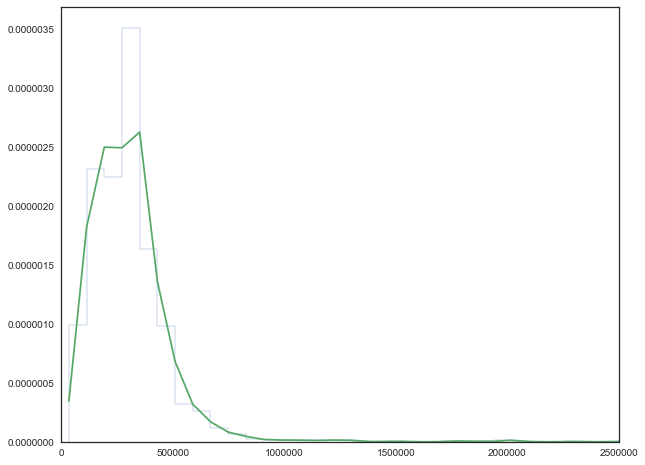

In [60]:
plt.figure(figsize=(10, 8))
import scipy.stats as stats
density = stats.gaussian_kde(master_data.Salary)
n, x, _=plt.hist(master_data.Salary, 50,histtype='step', density=True)
plt.xlim(0,2500000)
plt.plot(x, density(x))

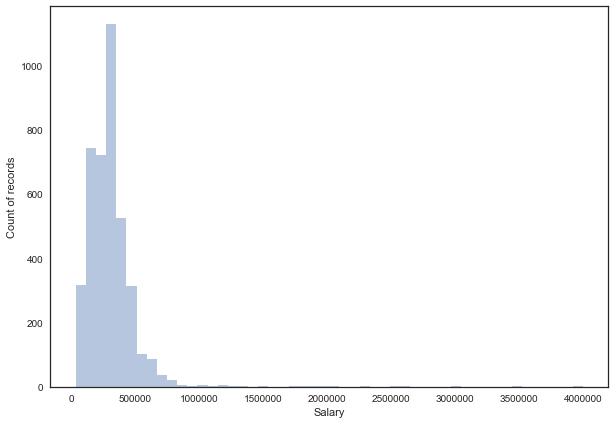

In [61]:
plt.figure(figsize=(10,7))
sns.distplot(master_data.Salary, norm_hist=False, kde=False)
plt.ylabel("Count of records")
plt.show()

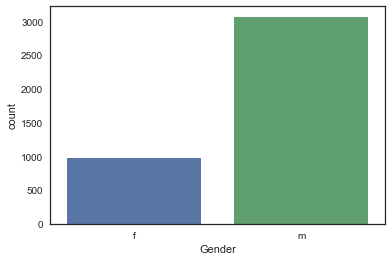

In [62]:
sns.countplot(x=master_data['Gender'], data=master_data)

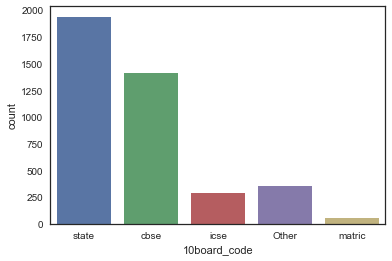

In [63]:
sns.countplot(x=master_data['10board_code'], data=master_data)

In [64]:
len(master_data.loc[(master_data['10board_code']=='state')])/len(master_data)

0.47921820880752103

In [65]:
len(master_data.loc[(master_data['12board_code']=='state')])/len(master_data)

0.5136071251855517

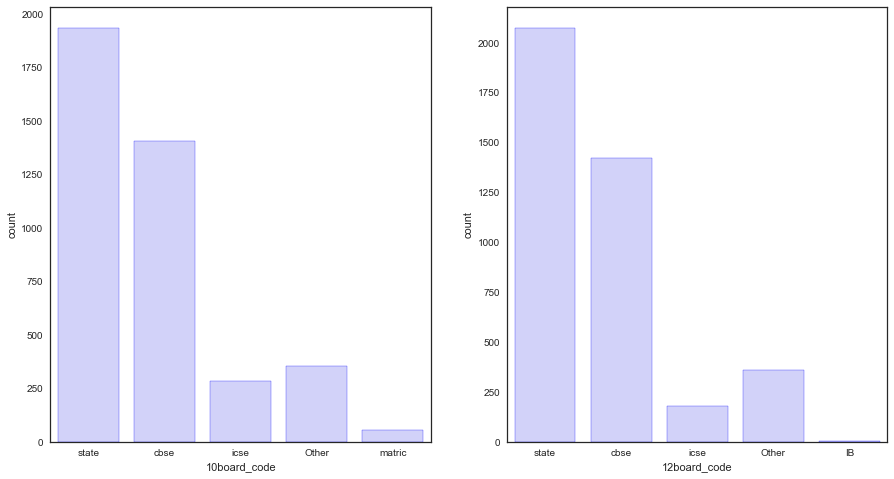

In [66]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.countplot(x=master_data['10board_code'], data=master_data,color=(0.8, 0.8, 1, 0.8),  edgecolor='blue')
plt.subplot(1,2,2)
sns.countplot(x=master_data['12board_code'], data=master_data, color=(0.8, 0.8, 1, 0.8),  edgecolor='blue')


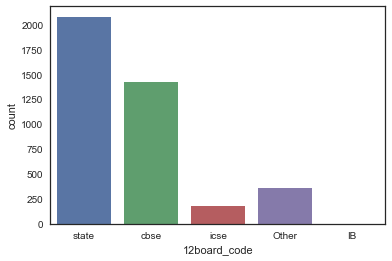

In [67]:
sns.countplot(x=master_data['12board_code'], data=master_data)

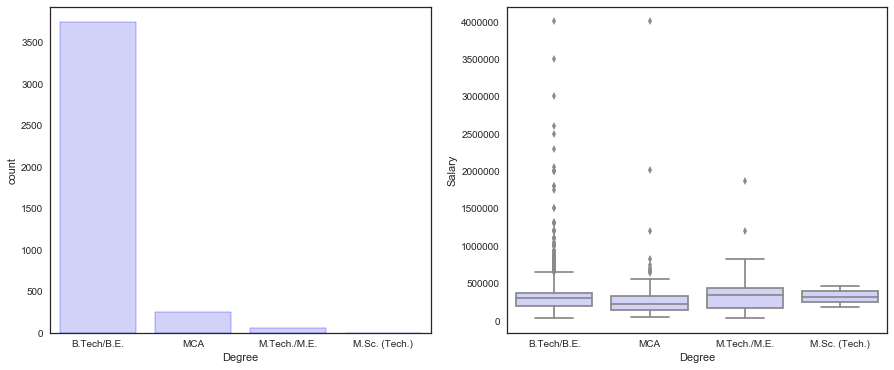

In [68]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.countplot(x=master_data['Degree'], data=master_data,color=(0.8, 0.8, 1, 0.8),  edgecolor='blue')
plt.subplot(1,2,2)
sns.boxplot(x = 'Degree', y = 'Salary', data = master_data,color=(0.8, 0.8, 1, 0.8))

In [69]:
len(master_data.loc[(master_data.Deg_before_DOJ)==1])/len(master_data)

0.9802078179119248

(0, 2500000)

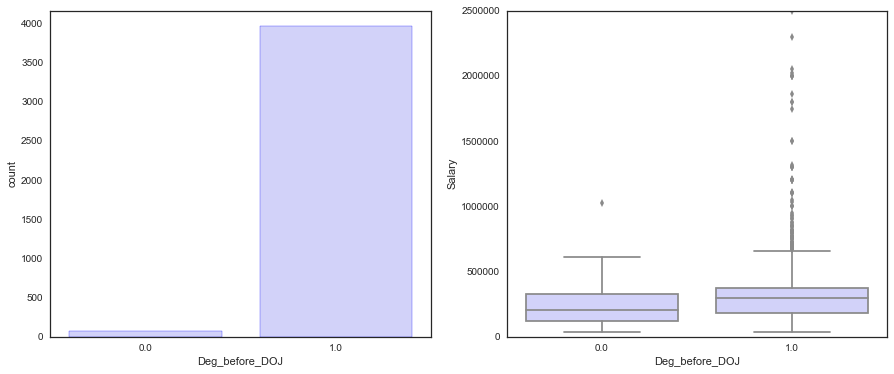

In [70]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.countplot(x=master_data['Deg_before_DOJ'], data=master_data,color=(0.8, 0.8, 1, 0.8),  edgecolor='blue')
plt.subplot(1,2,2)
sns.boxplot(x = 'Deg_before_DOJ', y = 'Salary', data = master_data,color=(0.8, 0.8, 1, 0.8))
plt.ylim(0,2500000)

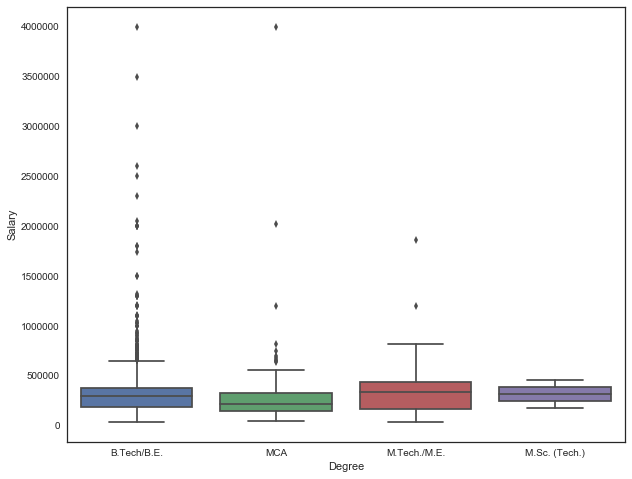

In [71]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'Degree', y = 'Salary', data = master_data)
plt.show()

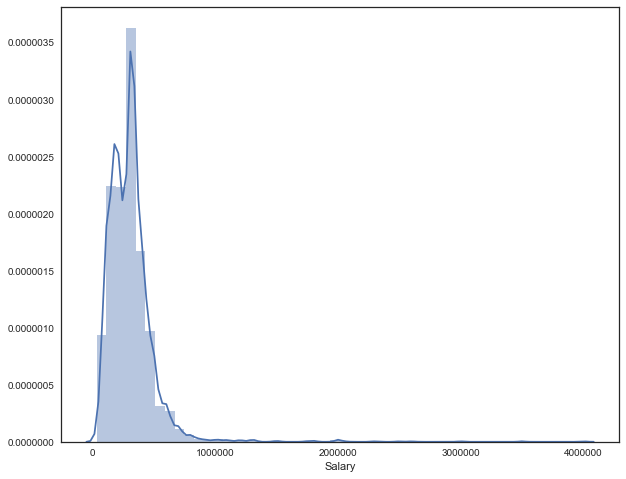

In [72]:
plt.figure(figsize=(10, 8))
sal_btech=master_data.loc[(master_data.Degree == 'B.Tech/B.E.')]
sns.distplot(sal_btech['Salary'])

(0, 2500000)

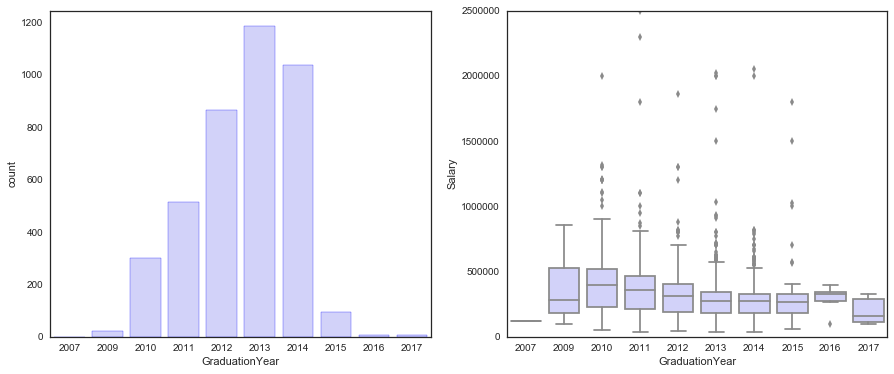

In [73]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.countplot(x=master_data['GraduationYear'], data=master_data,color=(0.8, 0.8, 1, 0.8),  edgecolor='blue')
plt.subplot(1,2,2)
sns.boxplot(x = 'GraduationYear', y = 'Salary', data = master_data,color=(0.8, 0.8, 1, 0.8))
plt.ylim(0,2500000)

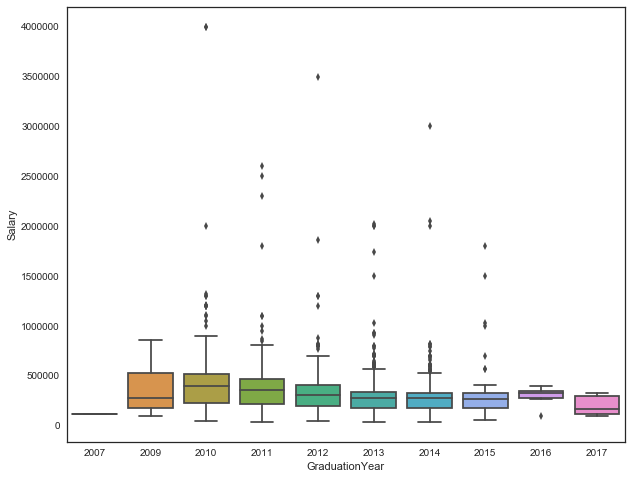

In [74]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'GraduationYear', y = 'Salary', data = master_data)
plt.show()

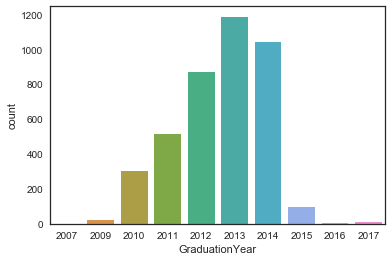

In [75]:
sns.countplot(x=master_data['GraduationYear'], data=master_data)

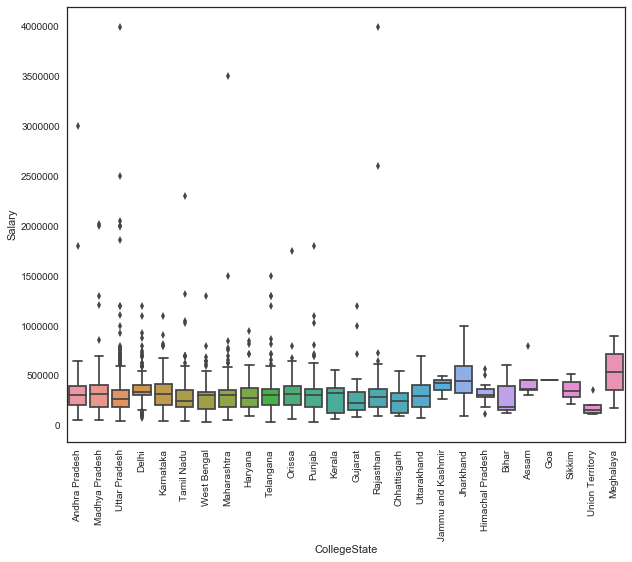

In [76]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'CollegeState', y = 'Salary', data = master_data)
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

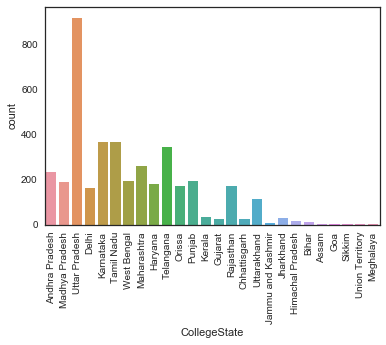

In [77]:
sns.countplot(x=master_data['CollegeState'], data=master_data)
plt.xticks(rotation=90)

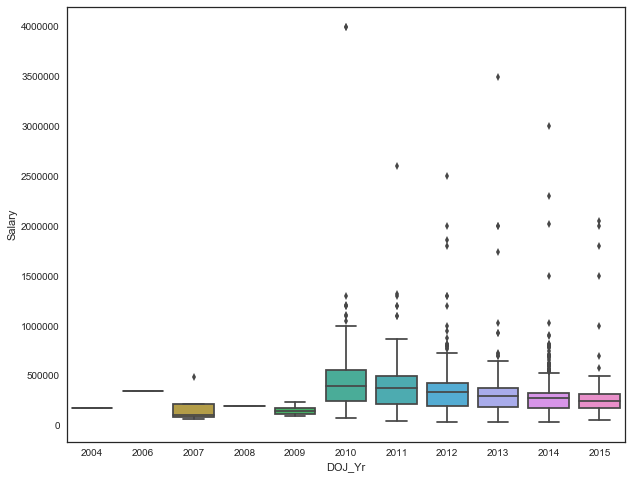

In [78]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'DOJ_Yr', y = 'Salary', data = master_data)
plt.show()


In [79]:
top=master_data.groupby('JobCity')
top1=top.count().sort_values(by='Salary',ascending=False).head(10)
top10=pd.DataFrame(top1.Salary)
top10.reset_index(inplace=True)
top10_city_data=master_data.loc[(master_data.JobCity.isin(top10.JobCity))]
top10_city_data

Salary                  DOL                  Designation Gender  \
0     420000   present              senior quality engineer      f       
2     325000   present              systems engineer             f       
3     1100000  present              senior software engineer     m       
5     300000   present              system engineer              m       
6     300000   2015-05-01 00:00:00  java software engineer       m       
...      ...                   ...                     ...      ..       
3993  280000   2012-10-01 00:00:00  software engineer            m       
3994  100000   2013-07-01 00:00:00  technical writer             f       
3995  320000   present              associate software engineer  m       
3996  200000   2015-01-01 00:00:00  software developer           f       
3997  400000   present              senior systems engineer      f       

            DOB  10percentage                         10board  12graduation  \
0    1990-02-19  84.30         board ofsecondary education,ap  2007           
2    1992-08-03  85.00         cbse                            2010           
3    1989-12-05  85.60         cbse                            2007           
5    1992-07-02  89.92         state board                     2010           
6    1993-02-01  86.08         state board                     2010           
...         ...    ...                 ...                      ...           
3993 1987-04-15  52.09         cbse                            2006           
3994 1992-08-27  90.00         state board                     2009           
3995 1991-07-03  81.86         bse,odisha                      2008           
3996 1992-03-20  78.72         state board                     2010           
3997 1991-02-26  70.60         cbse                            2008           

      12percentage                             12board  CollegeID  \
0     95.80         board of intermediate education,ap  1141        
2     68.20         cbse                                64          
3     83.60         cbse                                6920        
5     87.00         state board                         5086        
6     67.50         state board                         314         
...     ...                 ...                         ...         
3993  55.50         cbse                                6268        
3994  93.00         state board                         4883        
3995  65.50         chse,odisha                         9786        
3996  69.88         state board                         979         
3997  68.00         cbse                                6609        

      CollegeTier       Degree                             Specialization  \
0     2            B.Tech/B.E.  computer engineering                        
2     2            B.Tech/B.E.  information technology                      
3     1            B.Tech/B.E.  computer engineering                        
5     2            B.Tech/B.E.  electronics and communication engineering   
6     2            B.Tech/B.E.  computer science & engineering              
...  ..                    ...                             ...              
3993  2            B.Tech/B.E.  information technology                      
3994  2            B.Tech/B.E.  electronics and communication engineering   
3995  2            B.Tech/B.E.  computer engineering                        
3996  2            B.Tech/B.E.  computer science & engineering              
3997  2            B.Tech/B.E.  information technology                      

      collegeGPA  CollegeCityID  CollegeCityTier    CollegeState  \
0     7.800       1141           0                Andhra Pradesh   
2     7.000       64             0                Uttar Pradesh    
3     7.464       6920           1                Delhi            
5     7.632       5086           0                Karnataka        
6     7.298       314            1                Karnataka        
...    

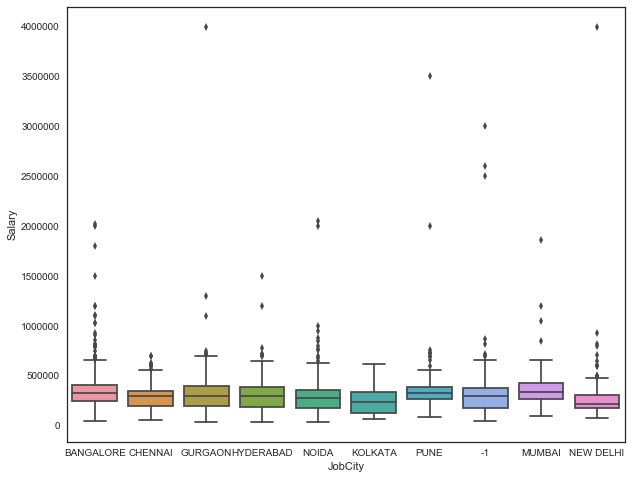

In [80]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'JobCity', y = 'Salary', data = top10_city_data)


(0, 2500000)

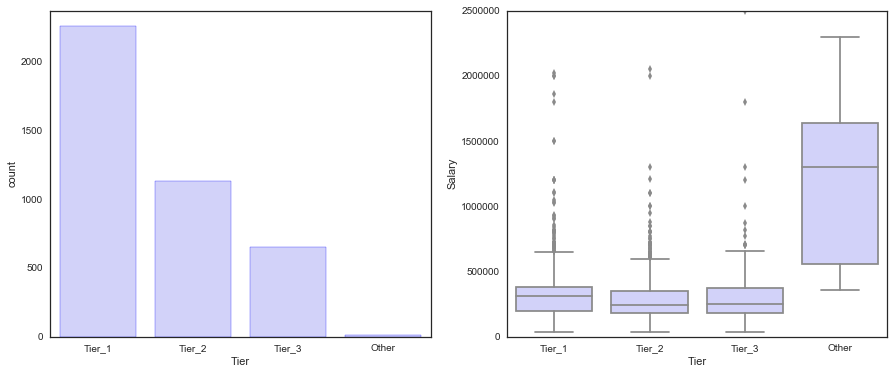

In [81]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.countplot(x=master_data['Tier'], data=master_data,color=(0.8, 0.8, 1, 0.8),  edgecolor='blue')
plt.subplot(1,2,2)
sns.boxplot(x = 'Tier', y = 'Salary', data = master_data,color=(0.8, 0.8, 1, 0.8))
plt.ylim(0,2500000)

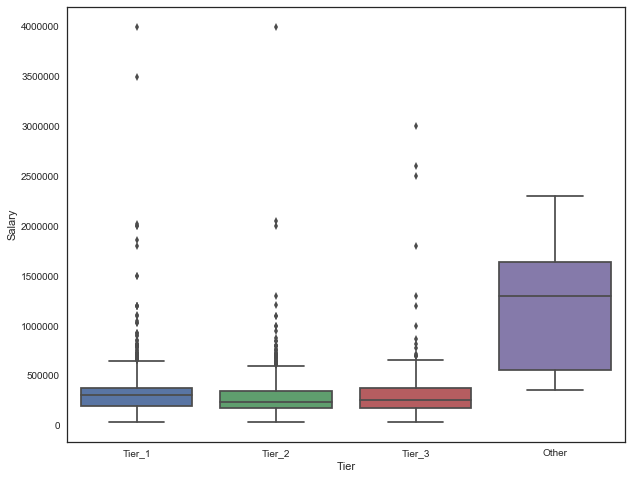

In [82]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'Tier', y = 'Salary', data = master_data)
plt.show()

In [83]:
len(master_data.loc[(master_data['Spec_Field']=='Computer') | (master_data['Spec_Field']=='IT') | (master_data['Spec_Field']=='Electronics')])/len(master_data)

0.8970806531420089

Text(0.5,0,'Fields of Specialization')

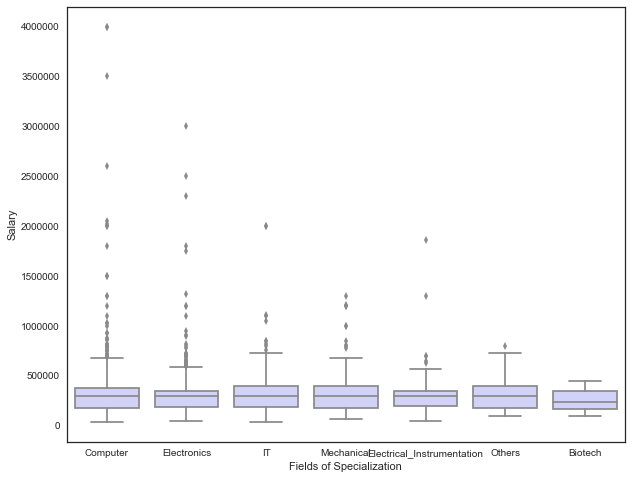

In [84]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'Spec_Field', y = 'Salary', data = master_data, color=(0.8, 0.8, 1, 0.8), dodge=False)
plt.xlabel('Fields of Specialization')

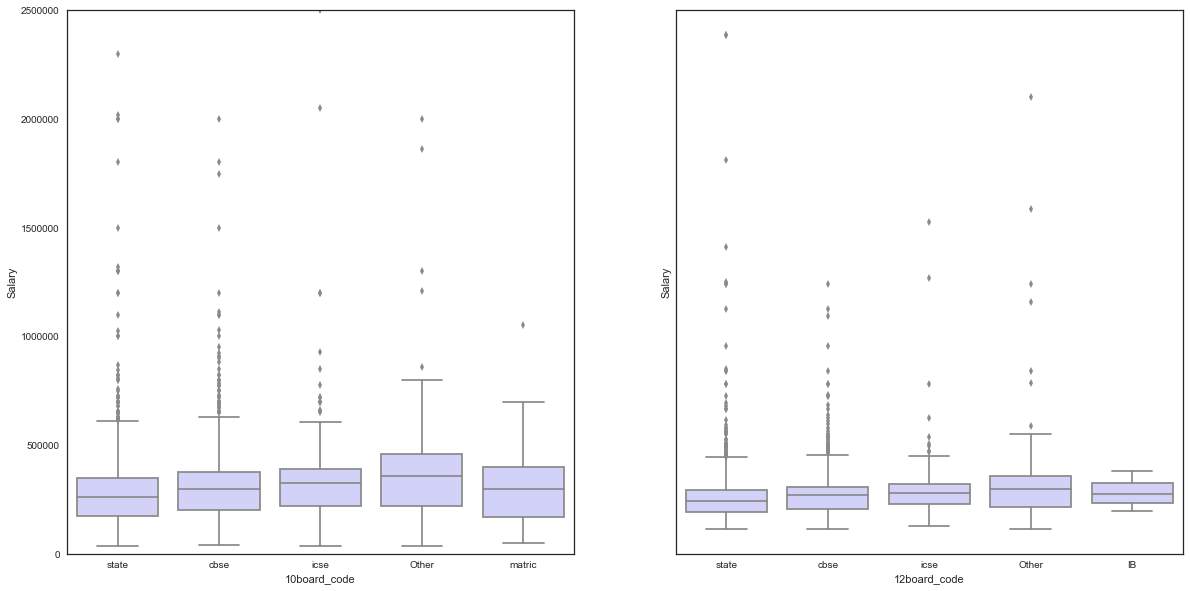

In [85]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
sns.boxplot(x = '10board_code', y = 'Salary', data = master_data, color=(0.8, 0.8, 1, 0.8))
plt.ylim(0,2500000)
plt.subplot(1,2,2)
sns.boxplot(x = '12board_code', y = 'Salary', data = master_data, color=(0.8, 0.8, 1, 0.8))
plt.yticks([])
plt.show()

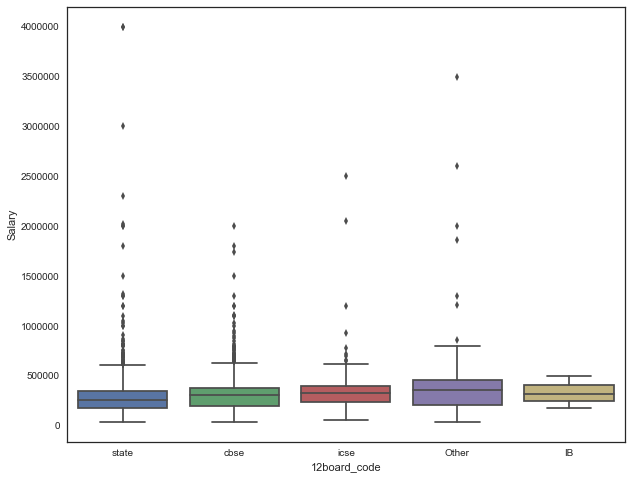

In [86]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = '12board_code', y = 'Salary', data = master_data)


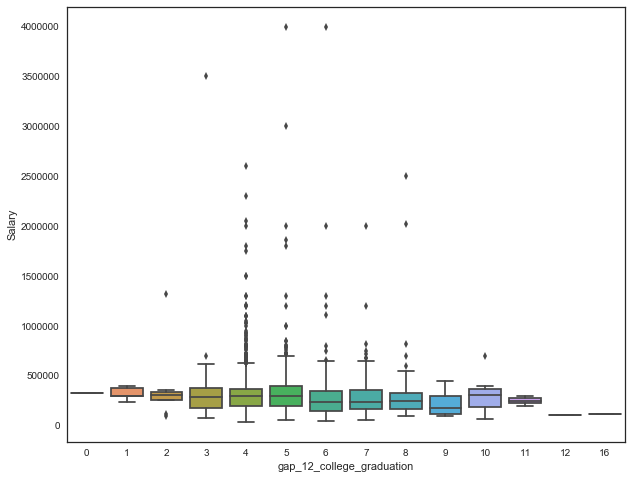

In [87]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'gap_12_college_graduation', y = 'Salary', data = master_data)


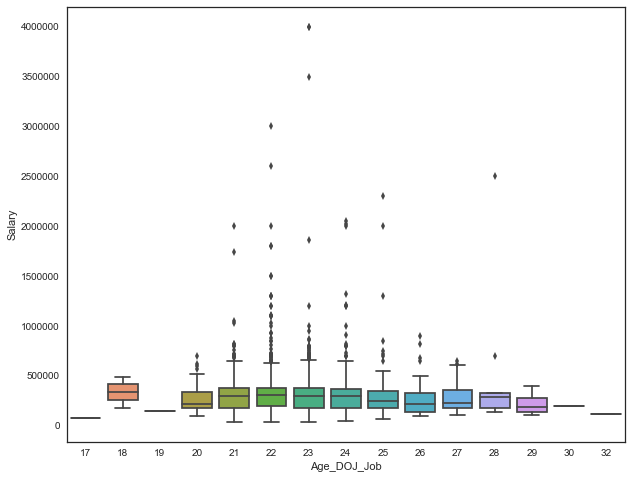

In [88]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'Age_DOJ_Job', y = 'Salary', data = master_data)


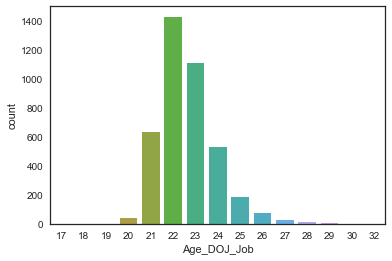

In [89]:
sns.countplot(x=master_data['Age_DOJ_Job'],data=master_data)

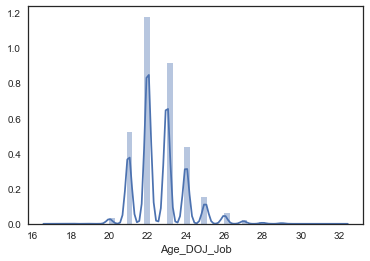

In [90]:
sns.distplot(master_data['Age_DOJ_Job'])

([], <a list of 0 Text yticklabel objects>)

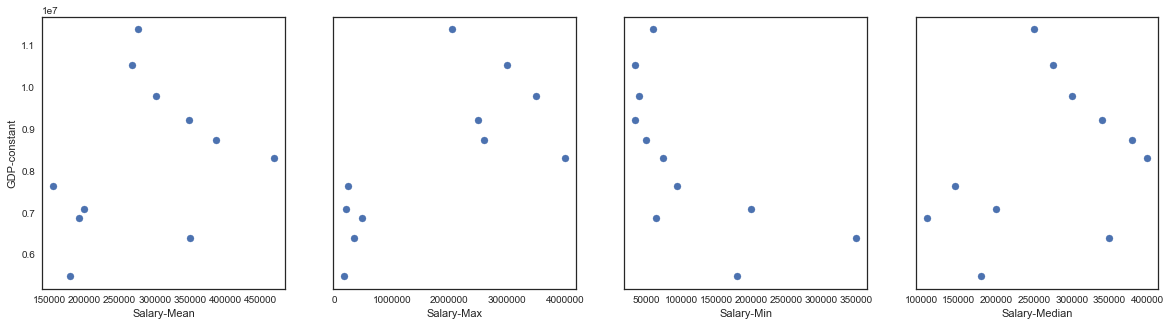

In [91]:
doj_yr=master_data.groupby('DOJ_Yr')
gdp=doj_yr['GDP-constant'].mean()
sal=doj_yr['Salary'].mean()
sal_max=doj_yr['Salary'].max()
sal_min=doj_yr['Salary'].min()
sal_median=doj_yr['Salary'].median()

plt.figure(figsize=(20, 5))
plt.subplot(1,4,1)
plt.scatter(sal, gdp)
plt.ylabel("GDP-constant")
plt.xlabel("Salary-Mean")

plt.subplot(1,4,2)
plt.scatter(sal_max,gdp)
plt.xlabel("Salary-Max")
plt.yticks([])

plt.subplot(1,4,3)
plt.scatter(sal_min,gdp)
plt.xlabel("Salary-Min")
plt.yticks([])

plt.subplot(1,4,4)
plt.scatter(sal_median,gdp)
plt.xlabel("Salary-Median")
plt.yticks([])


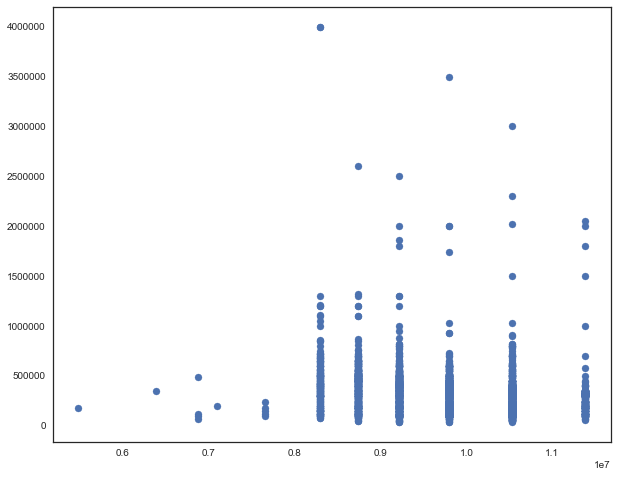

In [92]:
#doj_yr=master_data.groupby('DOJ_Yr')
gdp=master_data['GDP-constant']
sal=master_data['Salary']
plt.figure(figsize=(10, 8))
plt.scatter(gdp, sal)

In [93]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4042 entries, 0 to 3997
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Salary                     4042 non-null   int64         
 1   DOL                        4042 non-null   object        
 2   Designation                4042 non-null   object        
 3   Gender                     4042 non-null   object        
 4   DOB                        4042 non-null   datetime64[ns]
 5   10percentage               4042 non-null   float64       
 6   10board                    4042 non-null   object        
 7   12graduation               4042 non-null   int64         
 8   12percentage               4042 non-null   float64       
 9   12board                    4042 non-null   object        
 10  CollegeID                  4042 non-null   int64         
 11  CollegeTier                4042 non-null   int64         
 12  Degree

In [94]:
float_col=master_data.select_dtypes(include=[np.float]).columns
int_col=master_data.select_dtypes(include=[np.number]).columns

In [95]:
float_int_col=float_col.append(int_col)


In [96]:
float_int_col

Index(['10percentage', '12percentage', 'collegeGPA', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Deg_before_DOJ', 'Salary', '10percentage',
       '12graduation', '12percentage', 'CollegeID', 'CollegeTier',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'DOJ_Yr', 'gap_12_college_graduation', 'Deg_before_DOJ', 'Age_DOJ_Job',
       'GDP-constant'],
      dtype='object')

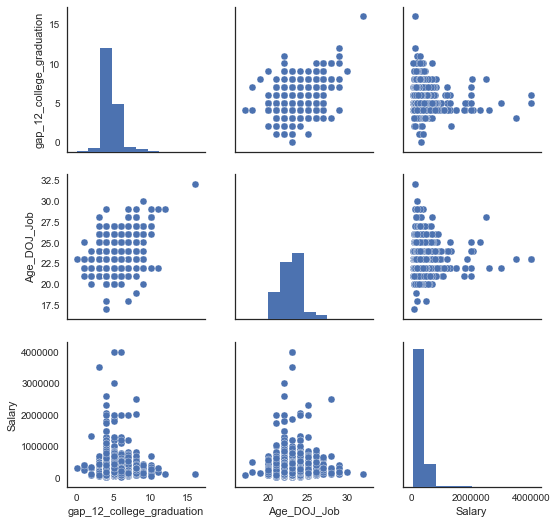

In [97]:
sns.pairplot(master_data[['gap_12_college_graduation','Age_DOJ_Job', 'Salary']])

([], <a list of 0 Text yticklabel objects>)

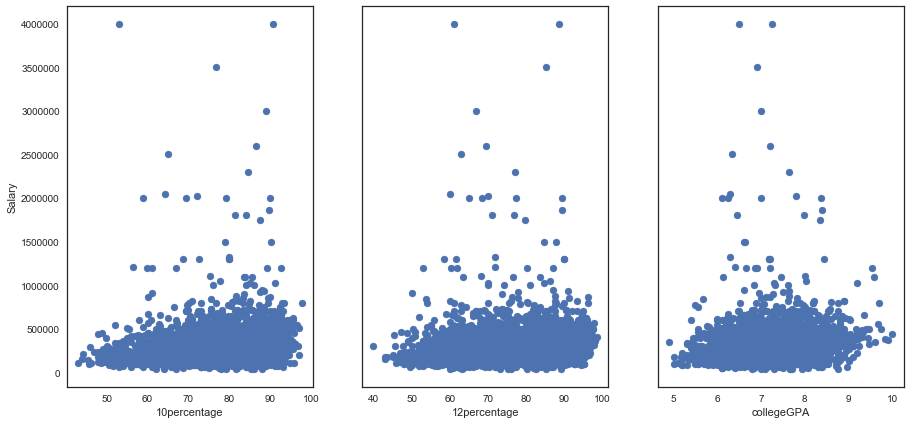

In [98]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.scatter(master_data['10percentage'], master_data.Salary)
plt.xlabel("10percentage")
plt.ylabel("Salary")
plt.subplot(1,3,2)
plt.scatter(master_data['12percentage'], master_data.Salary)
plt.xlabel("12percentage")
plt.yticks([])
plt.subplot(1,3,3)
plt.scatter(master_data.collegeGPA, master_data.Salary)
plt.xlabel("collegeGPA")
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

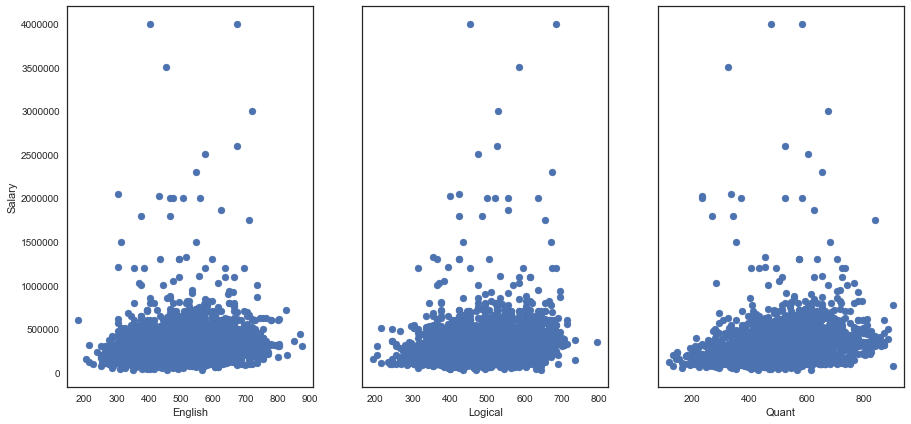

In [99]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.scatter(master_data['English'], master_data.Salary)
plt.xlabel("English")
plt.ylabel("Salary")
plt.subplot(1,3,2)
plt.scatter(master_data['Logical'], master_data.Salary)
plt.xlabel("Logical")
plt.yticks([])
plt.subplot(1,3,3)
plt.scatter(master_data.Quant, master_data.Salary)
plt.xlabel("Quant")
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

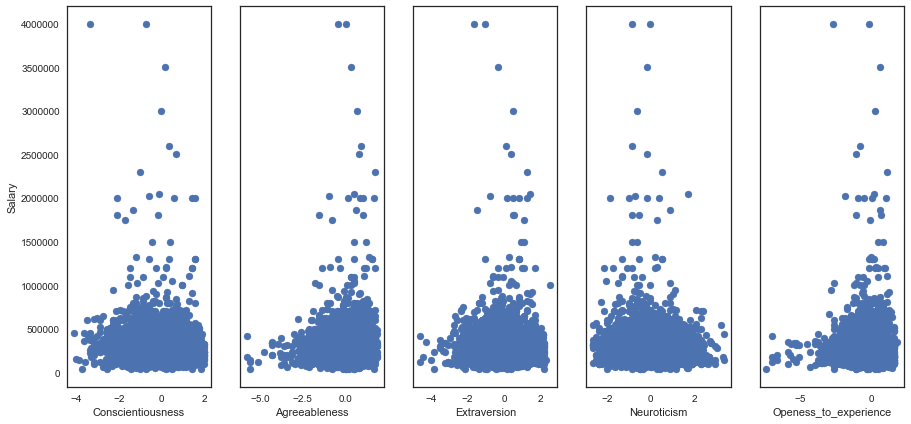

In [100]:
plt.figure(figsize=(15,7))
plt.subplot(1,5,1)
plt.scatter(master_data.conscientiousness, master_data.Salary)
plt.xlabel("Conscientiousness")
plt.ylabel("Salary")
plt.subplot(1,5,2)
plt.scatter(master_data.agreeableness, master_data.Salary)
plt.xlabel("Agreeableness")
plt.yticks([])
plt.subplot(1,5,3)
plt.scatter(master_data.extraversion, master_data.Salary)
plt.xlabel("Extraversion")
plt.yticks([])
plt.subplot(1,5,4)
plt.scatter(master_data.nueroticism, master_data.Salary)
plt.xlabel("Neuroticism")
plt.yticks([])
plt.subplot(1,5,5)
plt.scatter(master_data.openess_to_experience, master_data.Salary)
plt.xlabel("Openess_to_experience")
plt.yticks([])

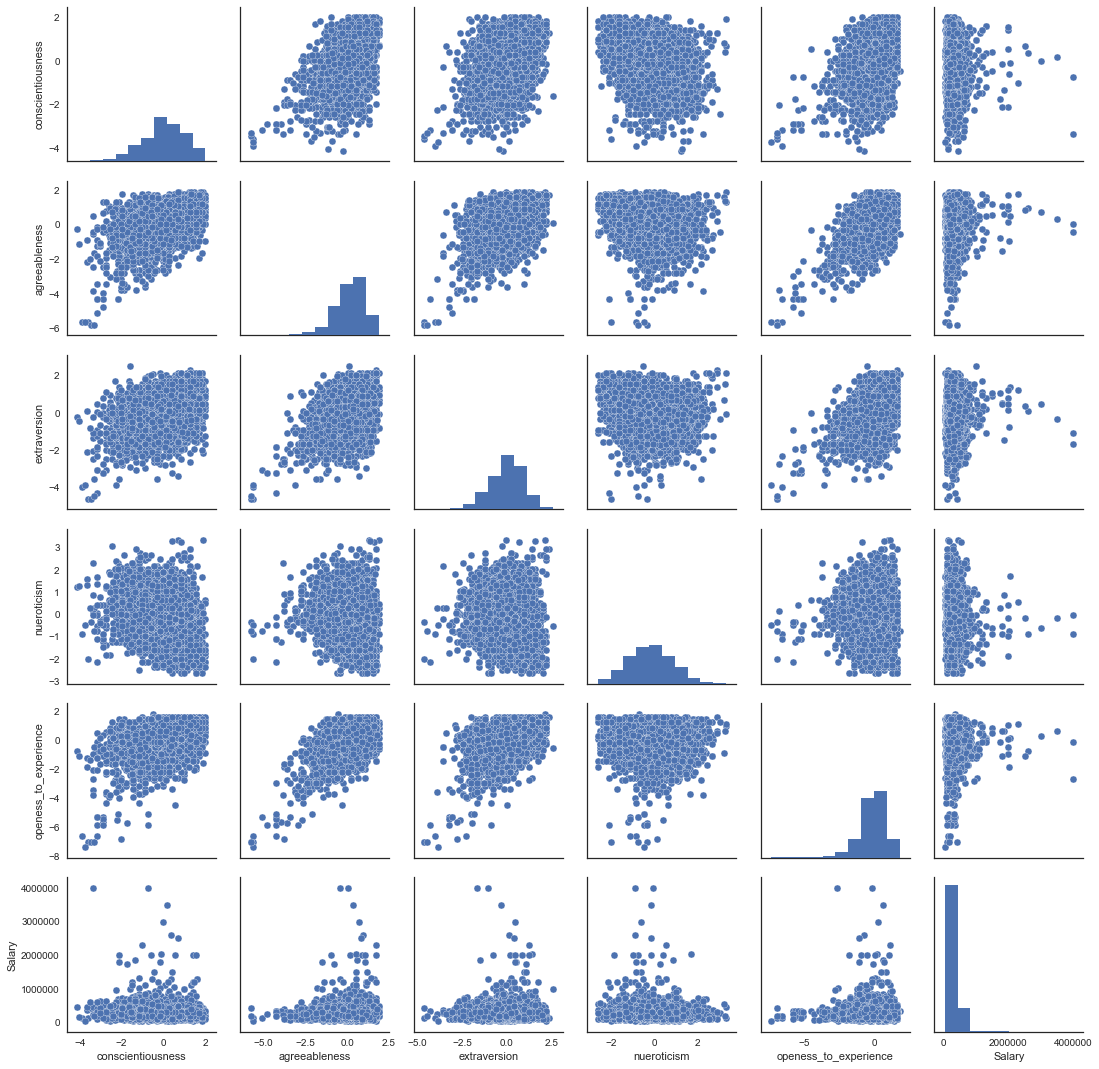

In [101]:
sns.pairplot(master_data[[ 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary']])

In [102]:
master_data.head(2)

Salary      DOL              Designation Gender        DOB  10percentage  \
0  420000  present  senior quality engineer  f     1990-02-19  84.3           
1  500000  present  assistant manager        m     1989-10-04  85.4           

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap  2007          95.8           
1  cbse                            2007          85.0           

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap  1141       2            B.Tech/B.E.   
1  cbse                                5807       2            B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0  computer engineering                       7.800       1141            
1  electronics and communication engineering  7.006       5807            

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0  0                Andhra Pradesh  2011            515      585      525     
1  0                Madhya Pradesh  2012            695      610      780     

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979  445                 -1                     -1                 
1  0.960603 -1                    466                   -1                 

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0 -1              -1              -1           -1          0.9737              
1 -1              -1              -1           -1         -0.7335              

   agreeableness  extraversion  nueroticism  openess_to_experience  DOJ_Yr  \
0  0.8128         0.5269        1.3549      -0.4455                 2012     
1  0.3789         1.2396       -0.1076       0.8637                 2013     

     JobCity    Tier   Spec_Field 10board_code 12board_code  \
0  BANGALORE  Tier_1  Computer     state        state         
1  INDORE     Tier_2  Electronics  cbse         cbse          

   gap_12_college_graduation  Deg_before_DOJ  Age_DOJ_Job  \
0  4                          1.0             22            
1  5                          1.0             24            

                                  Category     Year  GDP-constant  
0  Current Series (2011-12 Base) Estimates  2012-13  9213017       
1  Current Series (2011-12 Base) Estimates  2013-14  9801370

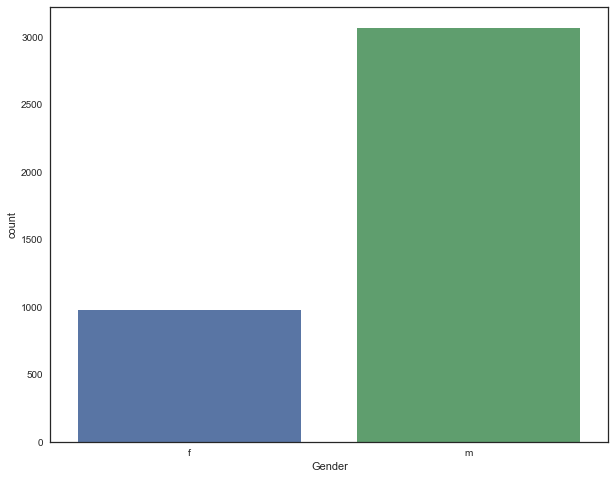

In [103]:
plt.figure(figsize=(10, 8))
sns.countplot(x=master_data['Gender'],data=master_data)

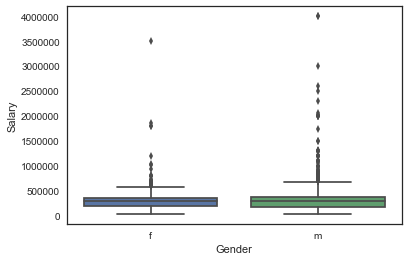

In [104]:
sns.boxplot(x=master_data['Gender'],y=master_data['Salary'],data=master_data)

([<matplotlib.axis.XTick at 0x1e316829ba8>,
 <a list of 7 Text xticklabel objects>)

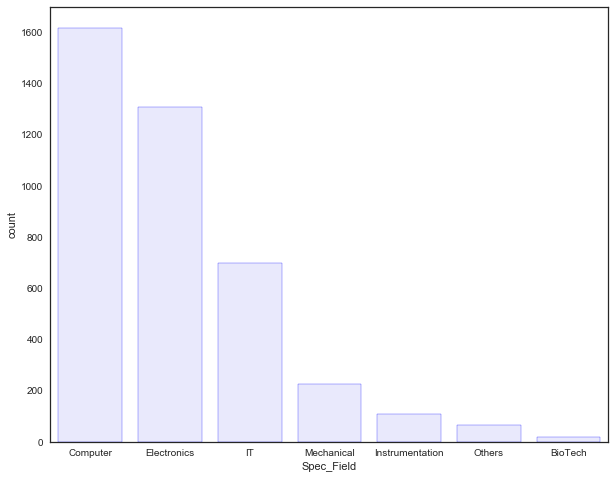

In [105]:
plt.figure(figsize=(10, 8))
sns.countplot(x=master_data['Spec_Field'],data=master_data, color=(0.9, 0.9, 1, 0.9),  edgecolor='blue')
locs, labels = plt.xticks()
plt.xticks(locs,('Computer','Electronics','IT','Mechanical','Instrumentation','Others','BioTech'))

(0, 2500000)

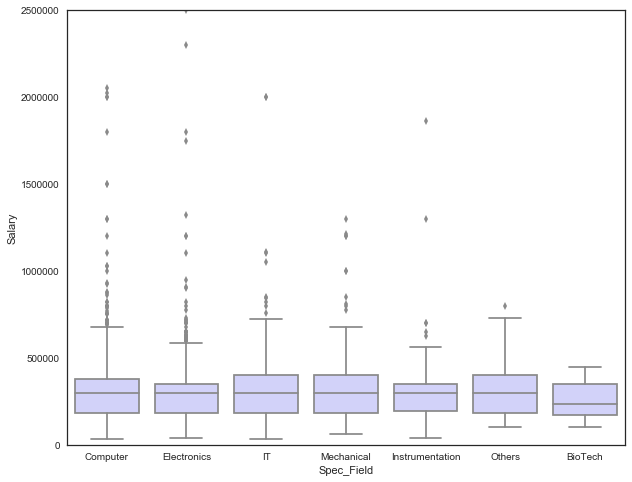

In [106]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Spec_Field',y='Salary',data=master_data, color=(0.8, 0.8, 1, 0.8))
locs, labels = plt.xticks()
plt.xticks(locs,('Computer','Electronics','IT','Mechanical','Instrumentation','Others','BioTech'))
plt.ylim([0,2500000])

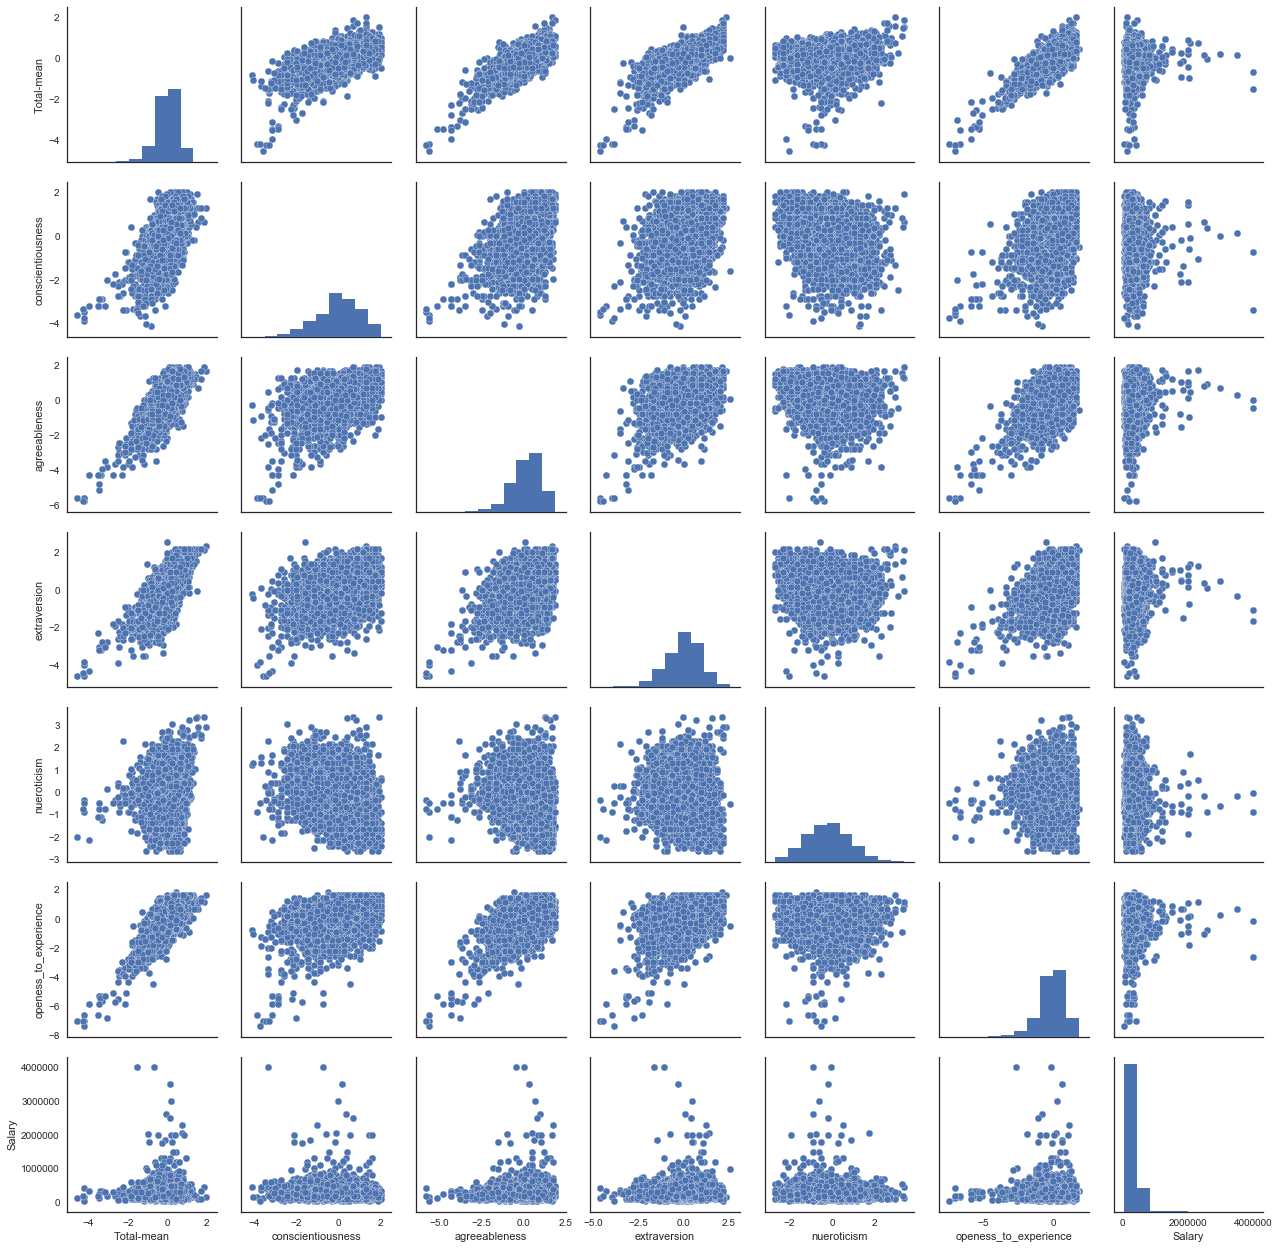

In [107]:
personality=master_data[['Salary','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience']]
#personality['sum_open_agree']=personality['openess_to_experience']+ personality['agreeableness']
#personality['sum_open_nuero']=personality['openess_to_experience']+ personality['nueroticism']
#personality['sum_open_extra']=personality['openess_to_experience']+ personality['extraversion']

personality['Total-mean']=(personality['openess_to_experience']+ personality['agreeableness'] +personality['nueroticism'] + personality['extraversion'] +personality['conscientiousness'])/5 
#sns.pairplot(personality[['agreeableness', 'extraversion', 'nueroticism',      'openess_to_experience','sum_open_agree','sum_open_nuero','sum_open_extra','Salary']])
sns.pairplot(personality[['Total-mean','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience','Salary']])

In [108]:
### replace Gender values with 0/1
master_data.Gender=master_data.Gender.apply(lambda x : 1 if ( x =='f') else 0)

In [109]:
degree=pd.get_dummies(master_data['Degree'],drop_first=False)
master_data=pd.concat([master_data,degree],axis=1)

In [110]:
master_data.drop(['Degree'],axis=1,inplace=True)

In [111]:
CollegeState=pd.get_dummies(master_data['CollegeState'],drop_first=False)
master_data=pd.concat([master_data,CollegeState],axis=1)

In [112]:
master_data.drop(['CollegeState'],axis=1,inplace=True)

In [113]:
## drop designation as it cannot be driver.
master_data.drop(['Designation'],axis=1,inplace=True)

In [114]:
tier_dummies=pd.get_dummies(master_data['Tier'],drop_first=False).rename(columns=lambda x: 'JobCityTier-' + str(x))
master_data=pd.concat([master_data,tier_dummies],axis=1)
master_data.drop(['Tier','JobCity'],axis=1,inplace=True)

In [115]:
special_dummies=pd.get_dummies(master_data['Spec_Field'],drop_first=False).rename(columns=lambda x: 'Specialisation-' + str(x))
master_data=pd.concat([master_data,special_dummies],axis=1)

In [116]:
master_data.drop(['Specialization','Spec_Field'],axis=1,inplace=True)

In [117]:
ten_dummies=pd.get_dummies(master_data['10board_code'],drop_first=False).rename(columns=lambda x: '10board-' + str(x))
master_data=pd.concat([master_data,ten_dummies],axis=1)

In [118]:
master_data.drop(['10board','10board_code'],axis=1,inplace=True)

In [119]:
twelboard_dummies=pd.get_dummies(master_data['12board_code'],drop_first=False).rename(columns=lambda x: '12board-' + str(x))
master_data=pd.concat([master_data,twelboard_dummies],axis=1)

In [120]:
master_data.drop(['12board','12board_code'],axis=1,inplace=True)

In [121]:
### Dropping DOL 
master_data.drop(['DOL'],axis=1,inplace=True)

In [122]:
master_data.drop(['Category','Year'],axis=1,inplace=True)

In [123]:
### drop - DOJ_Yr ,GraduationYear, CollegeID, 12graduation, DOB

In [124]:
### CollegeCityID & collegeID seem to be the same. Dropping CollegeCityID.
#master_data.drop(['CollegeCityID'],axis=1,inplace=True)
### Drop ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg,TelecomEngg,CivilEngg



In [125]:
CollegeTier_dummies=pd.get_dummies(master_data['CollegeTier'],drop_first=False).rename(columns=lambda x: 'CollegeTier-' + str(x))
master_data=pd.concat([master_data,CollegeTier_dummies],axis=1)

### Data for Model building

In [126]:
master_data.head(4)

Salary  Gender        DOB  10percentage  12graduation  12percentage  \
0  420000   1      1990-02-19  84.3          2007          95.8           
1  500000   0      1989-10-04  85.4          2007          85.0           
2  325000   1      1992-08-03  85.0          2010          68.2           
3  1100000  0      1989-12-05  85.6          2007          83.6           

   CollegeID  CollegeTier  collegeGPA  CollegeCityID  CollegeCityTier  \
0  1141       2            7.800       1141           0                 
1  5807       2            7.006       5807           0                 
2  64         2            7.000       64             0                 
3  6920       1            7.464       6920           1                 

   GraduationYear  English  Logical  Quant    Domain  ComputerProgramming  \
0  2011            515      585      525    0.635979  445                   
1  2012            695      610      780    0.960603 -1                     
2  2014            615      545      370    0.450877  395                   
3  2011            635      585      625    0.974396  615                   

   ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
0 -1                     -1               -1              -1                
1  466                   -1               -1              -1                
2 -1                     -1               -1              -1                
3 -1                     -1               -1              -1                

   TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
0 -1           -1          0.9737             0.8128         0.5269         
1 -1           -1         -0.7335             0.3789         1.2396         
2 -1           -1          0.2718             1.7109         0.1637         
3 -1           -1          0.0464             0.3448        -0.3440         

   nueroticism  openess_to_experience  DOJ_Yr  gap_12_college_graduation  \
0  1.3549      -0.4455                 2012    4                           
1 -0.1076       0.8637                 2013    5                           
2 -0.8682       0.6721                 2014    4                           
3 -0.4078      -0.9194                 2011    4                           

   Deg_before_DOJ  Age_DOJ_Job  GDP-constant  B.Tech/B.E.  M.Sc. (Tech.)  \
0  1.0             22           9213017       1            0               
1  1.0             24           9801370       1            0               
2  1.0             22           10527674      1            0               
3  1.0             22           8736331       1            0               

   M.Tech./M.E.  MCA  Andhra Pradesh  Assam  Bihar  Chhattisgarh  Delhi  Goa  \
0  0             0    1               0      0      0             0      0     
1  0             0    0               0      0      0             0      0     
2  0             0    0               0      0      0             0      0     
3  0             0    0               0      0      0             1      0     

   Gujarat  Haryana  Himachal Pradesh  Jammu and Kashmir  Jharkhand  \
0  0        0        0                 0                  0           
1  0        0        0                 0                  0           
2  0        0        0                 0                  0           
3  0        0        0                 0                  0           

   Karnataka  Kerala  Madhya Pradesh  Maharashtra  Meghalaya  Orissa  Punjab  \
0  0          0       0               0            0          0       0        
1  0          0       1               0            0          0       0        
2  0          0       0               0            0          0       0        
3  0          0       0               0            0          0       0        

   Rajasthan  Sikkim  Tamil Nadu  Telangana  Union Territory  Uttar Pradesh  \
0  0          0       0           0          0                0               
1  0          0       0   

In [127]:
master_data.describe()

Salary       Gender  10percentage  12graduation  12percentage  \
count  4.042000e+03  4042.000000  4042.000000   4042.000000   4042.000000    
mean   3.081047e+05  0.240722     77.961282     2008.078427   74.570740      
std    2.128575e+05  0.427575     9.842506      1.651388      11.040046      
min    3.500000e+04  0.000000     43.000000     1995.000000   40.000000      
25%    1.800000e+05  0.000000     71.800000     2007.000000   66.000000      
50%    3.000000e+05  0.000000     79.200000     2008.000000   74.400000      
75%    3.700000e+05  0.000000     85.760000     2009.000000   82.800000      
max    4.000000e+06  1.000000     97.760000     2013.000000   98.700000      

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count  4042.000000   4042.000000  4042.000000  4042.000000    4042.000000       
mean   5165.155121   1.926522     7.170910     5165.155121    0.303068          
std    4795.366444   0.260953     0.739958     4795.366444    0.459641          
min    2.000000      1.000000     4.907000     2.000000       0.000000          
25%    495.000000    2.000000     6.660000     495.000000     0.000000          
50%    3897.000000   2.000000     7.180000     3897.000000    0.000000          
75%    8818.000000   2.000000     7.640000     8818.000000    1.000000          
max    18409.000000  2.000000     9.993000     18409.000000   1.000000          

       GraduationYear      English      Logical        Quant       Domain  \
count  4042.000000     4042.000000  4042.000000  4042.000000  4042.000000   
mean   2012.598961     501.018308   501.192974   513.262246   0.608812      
std    1.316798        104.924046   86.787913    122.164831   0.265038      
min    2007.000000     180.000000   195.000000   120.000000   0.002750      
25%    2012.000000     425.000000   445.000000   430.000000   0.380092      
50%    2013.000000     500.000000   505.000000   515.000000   0.622643      
75%    2014.000000     570.000000   565.000000   595.000000   0.842248      
max    2017.000000     875.000000   795.000000   900.000000   0.999910      

       ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
count  4042.000000          4042.000000            4042.000000       
mean   353.465858           95.565067              89.814201         
std    205.075621           158.253987             174.596956        
min   -1.000000            -1.000000              -1.000000          
25%    295.000000          -1.000000              -1.000000          
50%    415.000000          -1.000000              -1.000000          
75%    495.000000           233.000000            -1.000000          
max    840.000000           612.000000             715.000000        

       MechanicalEngg  ElectricalEngg  TelecomEngg    CivilEngg  \
count  4042.000000     4042.000000     4042.000000  4042.000000   
mean   22.713756       16.288471       32.233548    2.643741      
std    97.619359       87.126380       105.501686   36.460387     
min   -1.000000       -1.000000       -1.000000    -1.000000      
25%   -1.000000       -1.000000       -1.000000    -1.000000      
50%   -1.000000       -1.000000       -1.000000    -1.000000      
75%   -1.000000       -1.000000       -1.000000    -1.000000      
max    623.000000      676.000000      548.000000   516.000000    

       conscientiousness  agreeableness  extraversion  nueroticism  \
count  4042.000000        4042.000000    4042.000000   4042.000000   
mean  -0.035748           0.147719       0.003711     -0.167636      
std    1.026728           0.940282       0.949614      1.006319      
min   -4.126700          -5.781600      -4.600900     -2.643000      
25%   -0.649100          -0.287100      -0.604800     -0.868200      
50%    0.046400           0.212400       0.091400     -0.234400      
75%    0.702700           0.812800       0.672000      0.526200      
max    1.995300           1.904800       2.535400      3.352500      

       openess_to_ex

In [128]:
model_data=master_data.copy()

In [129]:
model_data.drop(['CollegeCityID','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg'],axis=1,inplace=True)

In [130]:
model_data.head(4)

Salary  Gender        DOB  10percentage  12graduation  12percentage  \
0  420000   1      1990-02-19  84.3          2007          95.8           
1  500000   0      1989-10-04  85.4          2007          85.0           
2  325000   1      1992-08-03  85.0          2010          68.2           
3  1100000  0      1989-12-05  85.6          2007          83.6           

   CollegeID  CollegeTier  collegeGPA  CollegeCityTier  GraduationYear  \
0  1141       2            7.800       0                2011             
1  5807       2            7.006       0                2012             
2  64         2            7.000       0                2014             
3  6920       1            7.464       1                2011             

   English  Logical  Quant    Domain  conscientiousness  agreeableness  \
0  515      585      525    0.635979  0.9737             0.8128          
1  695      610      780    0.960603 -0.7335             0.3789          
2  615      545      370    0.450877  0.2718             1.7109          
3  635      585      625    0.974396  0.0464             0.3448          

   extraversion  nueroticism  openess_to_experience  DOJ_Yr  \
0  0.5269        1.3549      -0.4455                 2012     
1  1.2396       -0.1076       0.8637                 2013     
2  0.1637       -0.8682       0.6721                 2014     
3 -0.3440       -0.4078      -0.9194                 2011     

   gap_12_college_graduation  Deg_before_DOJ  Age_DOJ_Job  GDP-constant  \
0  4                          1.0             22           9213017        
1  5                          1.0             24           9801370        
2  4                          1.0             22           10527674       
3  4                          1.0             22           8736331        

   B.Tech/B.E.  M.Sc. (Tech.)  M.Tech./M.E.  MCA  Andhra Pradesh  Assam  \
0  1            0              0             0    1               0       
1  1            0              0             0    0               0       
2  1            0              0             0    0               0       
3  1            0              0             0    0               0       

   Bihar  Chhattisgarh  Delhi  Goa  Gujarat  Haryana  Himachal Pradesh  \
0  0      0             0      0    0        0        0                  
1  0      0             0      0    0        0        0                  
2  0      0             0      0    0        0        0                  
3  0      0             1      0    0        0        0                  

   Jammu and Kashmir  Jharkhand  Karnataka  Kerala  Madhya Pradesh  \
0  0                  0          0          0       0                
1  0                  0          0          0       1                
2  0                  0          0          0       0                
3  0                  0          0          0       0                

   Maharashtra  Meghalaya  Orissa  Punjab  Rajasthan  Sikkim  Tamil Nadu  \
0  0            0          0       0       0          0       0            
1  0            0          0       0       0          0       0            
2  0            0          0       0       0          0       0            
3  0            0          0       0       0          0       0            

   Telangana  Union Territory  Uttar Pradesh  Uttarakhand  West Bengal  \
0  0          0                0              0            0             
1  0          0                0              0            0             
2  0          0                1              0            0             
3  0          0                0              0            0             

   JobCityTier-Other  JobCityTier-Tier_1  JobCityTier-Tier_2  \
0  0                  1                   0                    
1  0                  0                   1                    
2  0                  1                   0                    
3  0                  0                   1                    

   JobCityTier-Tier_3  

In [131]:
model_data.drop(['CollegeTier','12graduation','CollegeID','GraduationYear','DOJ_Yr'],axis=1,inplace=True)

In [132]:
model_data.drop(['DOB'],axis=1,inplace=True)

In [133]:
#model_data.drop(['ID'],axis=1,inplace=True)

### Outlier check

In [134]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4042 entries, 0 to 3997
Data columns (total 72 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Salary                                     4042 non-null   int64  
 1   Gender                                     4042 non-null   int64  
 2   10percentage                               4042 non-null   float64
 3   12percentage                               4042 non-null   float64
 4   collegeGPA                                 4042 non-null   float64
 5   CollegeCityTier                            4042 non-null   int64  
 6   English                                    4042 non-null   int64  
 7   Logical                                    4042 non-null   int64  
 8   Quant                                      4042 non-null   int64  
 9   Domain                                     4042 non-null   float64
 10  conscientiousness       

In [135]:
model_data.describe()

Salary       Gender  10percentage  12percentage   collegeGPA  \
count  4.042000e+03  4042.000000  4042.000000   4042.000000   4042.000000   
mean   3.081047e+05  0.240722     77.961282     74.570740     7.170910      
std    2.128575e+05  0.427575     9.842506      11.040046     0.739958      
min    3.500000e+04  0.000000     43.000000     40.000000     4.907000      
25%    1.800000e+05  0.000000     71.800000     66.000000     6.660000      
50%    3.000000e+05  0.000000     79.200000     74.400000     7.180000      
75%    3.700000e+05  0.000000     85.760000     82.800000     7.640000      
max    4.000000e+06  1.000000     97.760000     98.700000     9.993000      

       CollegeCityTier      English      Logical        Quant       Domain  \
count  4042.000000      4042.000000  4042.000000  4042.000000  4042.000000   
mean   0.303068         501.018308   501.192974   513.262246   0.608812      
std    0.459641         104.924046   86.787913    122.164831   0.265038      
min    0.000000         180.000000   195.000000   120.000000   0.002750      
25%    0.000000         425.000000   445.000000   430.000000   0.380092      
50%    0.000000         500.000000   505.000000   515.000000   0.622643      
75%    1.000000         570.000000   565.000000   595.000000   0.842248      
max    1.000000         875.000000   795.000000   900.000000   0.999910      

       conscientiousness  agreeableness  extraversion  nueroticism  \
count  4042.000000        4042.000000    4042.000000   4042.000000   
mean  -0.035748           0.147719       0.003711     -0.167636      
std    1.026728           0.940282       0.949614      1.006319      
min   -4.126700          -5.781600      -4.600900     -2.643000      
25%   -0.649100          -0.287100      -0.604800     -0.868200      
50%    0.046400           0.212400       0.091400     -0.234400      
75%    0.702700           0.812800       0.672000      0.526200      
max    1.995300           1.904800       2.535400      3.352500      

       openess_to_experience  gap_12_college_graduation  Deg_before_DOJ  \
count  4042.000000            4042.000000                4042.000000      
mean  -0.137874               4.520534                   0.980208         
std    1.005685               1.004912                   0.139303         
min   -7.375700               0.000000                   0.000000         
25%   -0.669200               4.000000                   1.000000         
50%   -0.094300               4.000000                   1.000000         
75%    0.502400               5.000000                   1.000000         
max    1.822400               16.000000                  1.000000         

       Age_DOJ_Job  GDP-constant  B.Tech/B.E.  M.Sc. (Tech.)  M.Tech./M.E.  \
count  4042.000000  4.042000e+03  4042.000000  4042.000000    4042.000000    
mean   22.623701    9.926272e+06  0.925037     0.000495       0.013607       
std    1.294789     7.919006e+05  0.263364     0.022241       0.115868       
min    17.000000    5.480380e+06  0.000000     0.000000       0.000000       
25%    22.000000    9.213017e+06  1.000000     0.000000       0.000000       
50%    22.000000    9.801370e+06  1.000000     0.000000       0.000000       
75%    23.000000    1.052767e+07  1.000000     0.000000       0.000000       
max    32.000000    1.138614e+07  1.000000     1.000000       1.000000       

               MCA  Andhra Pradesh        Assam        Bihar  Chhattisgarh  \
count  4042.000000  4042.000000     4042.000000  4042.000000  4042.000000    
mean   0.060861     0.058387        0.001237     0.002474     0.006680       
std    0.239105     0.234503        0.035154     0.049684     0.081467       
min    0.000000     0.000000        0.000000     0.000000     0.000000       
25%    0.000000     0.000000        0.000000     0.000000     0.000000       
50%    0.000000     0.000000        0.000000     0.000000     0.000000       
75%    0.000000     0.000000        0.000000     0.000000   

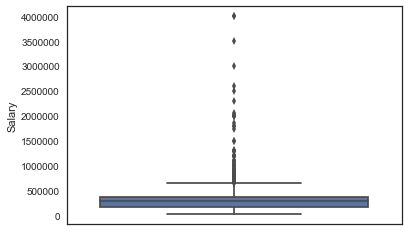

In [136]:
sns.boxplot(y='Salary',data=master_data)

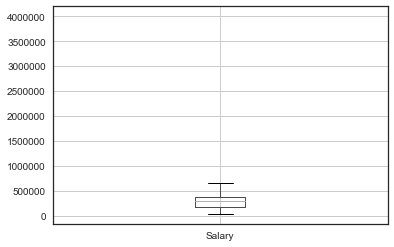

In [137]:
boxplot = model_data.boxplot(column=['Salary'])

In [138]:
### remove records with salary more than 3 times SD.

#len(model_data.loc[(model_data.Salary <= 3*2.128575e+05)])

In [139]:
##model_data=model_data.loc[(model_data.Salary <= 3*2.128575e+05)]

In [140]:
Q1,Q3 = np.percentile(model_data.Salary , [25,75])
IQR = Q3- Q1
model_data=model_data.loc[(model_data.Salary >= Q1 - (1.5 * IQR))]
model_data=model_data.loc[(model_data.Salary <= Q3 + (1.5 * IQR))]
model_data.describe()

Salary       Gender  10percentage  12percentage   collegeGPA  \
count  3930.000000    3930.000000  3930.000000   3930.000000   3930.000000   
mean   285632.061069  0.242748     77.891954     74.521079     7.163669      
std    126740.853999  0.428799     9.841327      11.038992     0.736014      
min    35000.000000   0.000000     43.000000     40.000000     4.907000      
25%    180000.000000  0.000000     71.670000     66.000000     6.650000      
50%    300000.000000  0.000000     79.000000     74.400000     7.170000      
75%    360000.000000  0.000000     85.650000     82.600000     7.630000      
max    655000.000000  1.000000     97.120000     98.700000     9.993000      

       CollegeCityTier      English      Logical        Quant       Domain  \
count  3930.000000      3930.000000  3930.000000  3930.000000  3930.000000   
mean   0.302545         499.985496   500.418321   511.454707   0.605407      
std    0.459418         104.745308   86.463209    121.437723   0.265149      
min    0.000000         180.000000   195.000000   120.000000   0.002750      
25%    0.000000         425.000000   445.000000   430.000000   0.377551      
50%    0.000000         500.000000   505.000000   515.000000   0.622643      
75%    1.000000         570.000000   565.000000   595.000000   0.829585      
max    1.000000         875.000000   795.000000   900.000000   0.999910      

       conscientiousness  agreeableness  extraversion  nueroticism  \
count  3930.000000        3930.000000    3930.000000   3930.000000   
mean  -0.029746           0.142995       0.001732     -0.161565      
std    1.026179           0.942664       0.950533      1.007795      
min   -4.126700          -5.781600      -4.600900     -2.643000      
25%   -0.589900          -0.287100      -0.604800     -0.868200      
50%    0.046400           0.212400       0.091400     -0.172770      
75%    0.702700           0.812800       0.672000      0.526200      
max    1.995300           1.904800       2.315400      3.352500      

       openess_to_experience  gap_12_college_graduation  Deg_before_DOJ  \
count  3930.000000            3930.000000                3930.000000      
mean  -0.137611               4.513995                   0.979898         
std    1.008743               0.997290                   0.140366         
min   -7.375700               0.000000                   0.000000         
25%   -0.669200               4.000000                   1.000000         
50%   -0.089350               4.000000                   1.000000         
75%    0.502400               5.000000                   1.000000         
max    1.822400               16.000000                  1.000000         

       Age_DOJ_Job  GDP-constant  B.Tech/B.E.  M.Sc. (Tech.)  M.Tech./M.E.  \
count  3930.000000  3.930000e+03  3930.000000  3930.000000    3930.000000    
mean   22.618066    9.942307e+06  0.926209     0.000509       0.012723       
std    1.290737     7.815603e+05  0.261464     0.022556       0.112089       
min    17.000000    5.480380e+06  0.000000     0.000000       0.000000       
25%    22.000000    9.213017e+06  1.000000     0.000000       0.000000       
50%    22.000000    9.801370e+06  1.000000     0.000000       0.000000       
75%    23.000000    1.052767e+07  1.000000     0.000000       0.000000       
max    32.000000    1.138614e+07  1.000000     1.000000       1.000000       

               MCA  Andhra Pradesh        Assam        Bihar  Chhattisgarh  \
count  3930.000000  3930.000000     3930.000000  3930.000000  3930.000000    
mean   0.060560     0.059542        0.001018     0.002545     0.006870       
std    0.238551     0.236666        0.031891     0.050386     0.082612       
min    0.000000     0.000000        0.000000     0.000000     0.000000       
25%    0.000000     0.000000        0.000000     0.000000     0.000000       
50%    0.000000     0.000000        0.000000     0.000000     0.000000       
75%    0.000000     0.000000        0.000000     0.0

###  Test - Train split

In [141]:
model_data.shape

(3930, 72)

In [142]:
from sklearn.model_selection import train_test_split
X = model_data.drop(['Salary'], axis=1)
y=model_data['Salary']

In [143]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [144]:
X_train.shape


(2751, 71)

In [145]:
X_test.shape


(1179, 71)

In [146]:
y_train.shape


(2751,)

In [147]:
y_test.shape

(1179,)

### Feature Scaling

In [148]:
cols_scale=['10percentage','12percentage','collegeGPA','English','Logical','Quant','Domain','conscientiousness','agreeableness',
           'extraversion','nueroticism','openess_to_experience','gap_12_college_graduation','Age_DOJ_Job','GDP-constant']


In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[cols_scale]= scaler.fit_transform(X_train[cols_scale])
X_train.head(4)

Gender  10percentage  12percentage  collegeGPA  CollegeCityTier  \
3597  1      -1.290236     -1.864460     -0.763842    0                 
2017  0      -0.053299     -0.292686      0.330809    0                 
2923  0      -1.087459     -0.128198     -0.924230    0                 
3681  0      -0.108048      0.511477      0.480504    0                 

       English   Logical     Quant    Domain  conscientiousness  \
3597 -0.915130 -0.869074 -0.857835  0.014717  0.978674            
2017 -0.430633 -0.060595 -1.146283 -2.117530  0.150328            
2923  1.507354 -0.638080  0.131128 -1.113386 -0.686933            
3681  0.441461  0.285896  1.985433  1.336887 -0.553202            

      agreeableness  extraversion  nueroticism  openess_to_experience  \
3597 -0.445456      -1.268930     -0.716917     0.614372                
2017 -1.163264      -0.146519      0.304219     0.028809                
2923  1.382726       0.252000      0.455240    -0.315836                
3681 -0.276391      -1.435023     -0.454476    -1.099432                

      gap_12_college_graduation  Deg_before_DOJ  Age_DOJ_Job  GDP-constant  \
3597  0.489767                   1.0             0.291475    -2.125669       
2017  0.489767                   0.0            -2.039479    -1.566646       
2923  0.489767                   1.0             0.291475    -0.954188       
3681  0.489767                   1.0             0.291475    -0.198257       

      B.Tech/B.E.  M.Sc. (Tech.)  M.Tech./M.E.  MCA  Andhra Pradesh  Assam  \
3597  1            0              0             0    0               0       
2017  1            0              0             0    0               0       
2923  1            0              0             0    0               0       
3681  1            0              0             0    0               0       

      Bihar  Chhattisgarh  Delhi  Goa  Gujarat  Haryana  Himachal Pradesh  \
3597  0      0             0      0    0        0        0                  
2017  0      0             0      0    0        0        0                  
2923  0      0             0      0    0        0        0                  
3681  0      0             0      0    0        0        0                  

      Jammu and Kashmir  Jharkhand  Karnataka  Kerala  Madhya Pradesh  \
3597  0                  0          0          0       1                
2017  0                  0          0          0       0                
2923  0                  0          0          0       0                
3681  0                  0          0          0       0                

      Maharashtra  Meghalaya  Orissa  Punjab  Rajasthan  Sikkim  Tamil Nadu  \
3597  0            0          0       0       0          0       0            
2017  0            0          0       0       1          0       0            
2923  0            0          0       0       0          0       0            
3681  0            0          0       0       0          0       0            

      Telangana  Union Territory  Uttar Pradesh  Uttarakhand  West Bengal  \
3597  0          0                0              0            0             
2017  0          0                0              0            0             
2923  0          0                1              0            0             
3681  0          0                0              1            0             

      JobCityTier-Other  JobCityTier-Tier_1  JobCityTier-Tier_2  \
3597  0                  0                   1                    
2017  0                  0                   0                    
2923  0                  0                   1                    
3681  0                  0                   1                    

      JobCityTier-Tier_3  Specialisation-Biotech  Specialisation-Computer  \
3597  0                   1                       0                         
2017  1                   0                       1                         
2923  0                   0                       0    

### 1. Model Building - Wrapper based

### Feature selection using rFE


In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [151]:
X_rfe=X_train.copy()
Y_rfe=y_train
estimator_lr=LinearRegression()
rfe = RFE(estimator_lr, 15)             # running RFE
rfe = rfe.fit(X_rfe,Y_rfe)

In [152]:
ranking=pd.DataFrame(list(zip(X_rfe.columns,rfe.support_,rfe.ranking_)),columns=('Feature','FistList','Rank'))
ranking. head(3)

Feature  FistList  Rank
0  Gender        False     44  
1  10percentage  False     47  
2  12percentage  True      1

In [153]:
col_rfe = X_rfe.columns[rfe.support_]
col_rfe

Index(['12percentage', 'Deg_before_DOJ', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Meghalaya', 'Sikkim', 'Tamil Nadu', 'Union Territory',
       'JobCityTier-Other', 'Specialisation-Others', '10board-Other',
       '10board-matric', '12board-IB', 'CollegeTier-2'],
      dtype='object')

In [154]:
ranking.loc[(ranking.Rank >= 2) & (ranking.Rank<=20)]

Feature  FistList  Rank
20  M.Tech./M.E.             False     20  
22  Andhra Pradesh           False     9   
24  Bihar                    False     18  
28  Gujarat                  False     8   
34  Kerala                   False     4   
35  Madhya Pradesh           False     16  
38  Orissa                   False     12  
39  Punjab                   False     19  
43  Telangana                False     6   
46  Uttarakhand              False     13  
47  West Bengal              False     15  
50  JobCityTier-Tier_2       False     7   
51  JobCityTier-Tier_3       False     14  
53  Specialisation-Computer  False     17  
56  Specialisation-IT        False     11  
65  12board-Other            False     10  
66  12board-cbse             False     3   
67  12board-icse             False     2   
69  CollegeTier-1            False     5

In [155]:
# Calculate the VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_vif = X_train.copy()
X_vif=X_vif[col_rfe]
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
14  CollegeTier-2          11.74
1   Deg_before_DOJ         11.65
7   Tamil Nadu             1.32 
12  10board-matric         1.19 
4   Karnataka              1.14 
11  10board-Other          1.12 
0   12percentage           1.05 
9   JobCityTier-Other      1.02 
10  Specialisation-Others  1.02 
3   Jharkhand              1.01 
5   Meghalaya              1.01 
6   Sikkim                 1.01 
13  12board-IB             1.01 
2   Jammu and Kashmir      1.00 
8   Union Territory        1.00

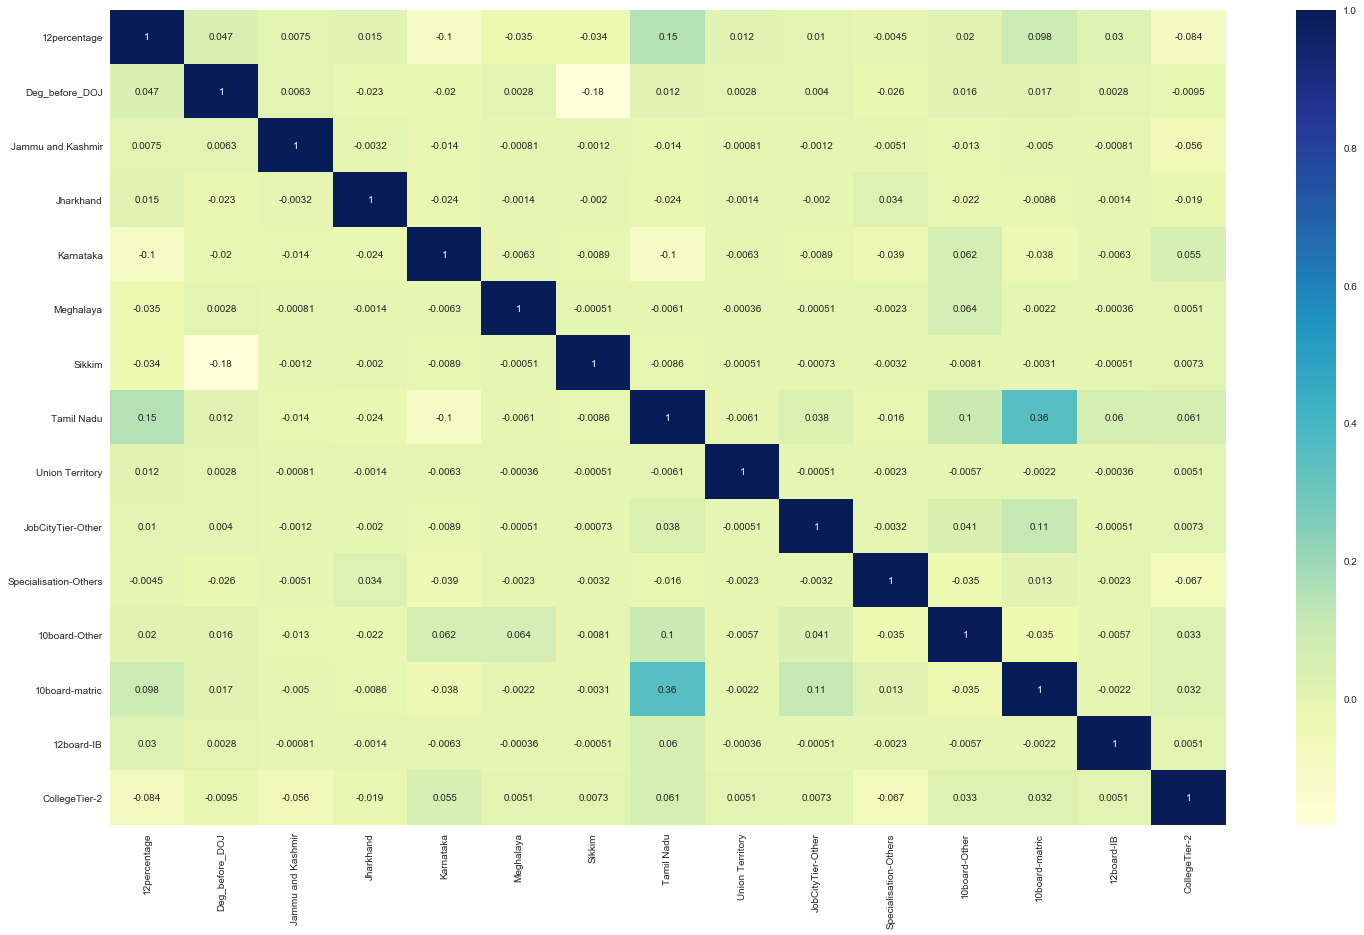

In [156]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X_vif.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [157]:
import statsmodels.api as sm
X_mod=X_train[col_rfe]
X_mod = sm.add_constant(X_mod)
y_mod=y_train
linear_m1 = sm.OLS(y_mod,X_mod).fit()
linear_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     31.78
Date:                Mon, 04 May 2020   Prob (F-statistic):           2.12e-84
Time:                        18:59:43   Log-Likelihood:                -35994.
No. Observations:                2751   AIC:                         7.202e+04
Df Residuals:                    2735   BIC:                         7.212e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.974e+05   1.78e+04     16.718      0.000    2.63e+05    3.32e+05
12percentage           3.716e+04   2278.837     16.305      0.000    3.27e+04    4.16e+04
Deg_before_DOJ         5.247e+04   1.58e+04      3.322      0.001    2.15e+04    8.35e+04
Jammu and Kashmir      8.566e+04   5.24e+04      1.636      0.102    -1.7e+04    1.88e+05
Jharkhand               9.88e+04   3.03e+04      3.262      0.001    3.94e+04    1.58e+05
Karnataka              3.712e+04   7609.726      4.878      0.000    2.22e+04     5.2e+04
Meghalaya             -8.606e+04   1.17e+05     -0.735      0.463   -3.16e+05    1.44e+05
Sikkim                 1.917e+05   8.41e+04      2.280      0.023    2.68e+04    3.57e+05
Tamil Nadu            -4.629e+04   8447.437     -5.480      0.000   -6.29e+04   -2.97e+04
Union Territory        -1.88e+05   1.17e+05     -1.610      0.108   -4.17e+05     4.1e+04
JobCityTier-Other      7.076e+04   8.32e+04      0.850      0.395   -9.25e+04    2.34e+05
Specialisation-Others -4.106e+04   1.92e+04     -2.142      0.032   -7.86e+04   -3476.554
10board-Other          5.383e+04   8234.164      6.538      0.000    3.77e+04       7e+04
10board-matric         3.391e+04   2.09e+04      1.621      0.105   -7099.847    7.49e+04
12board-IB            -1.079e+05   1.17e+05     -0.922      0.357   -3.38e+05    1.22e+05
CollegeTier-2         -7.509e+04   8951.875     -8.388      0.000   -9.26e+04   -5.75e+04
==============================================================================
Omnibus:                       74.107   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.739
Skew:                           0.417   Prob(JB):                     4.84e-18
Kurtosis:                       3.015   Cond. No.                         89.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
## removing Kerala
#col_rfe=['Quant', 'Gujarat', 'Jammu and Kashmir', 'Jharkhand',       'Meghalaya', 'Sikkim', 'Union Territory', 'JobCityTier-Other',       'JobCityTier-Tier_2', 'Specialisation-Others', '12board-IB',       '12board-Other', 'Deg_before_DOJ', 'CollegeTier-2']

col_rfe=['Quant','12percentage', 'Deg_before_DOJ','Jammu and Kashmir','Jharkhand',
       'Karnataka', 'Sikkim', 'Tamil Nadu', 'Union Territory',
        'Specialisation-Others', '10board-Other',
       '10board-matric',  'CollegeTier-2']
import statsmodels.api as sm
X_mod=X_train[col_rfe]
X_mod = sm.add_constant(X_mod)
y_mod=y_train
linear_m2 = sm.OLS(y_mod,X_mod).fit()
linear_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     55.58
Date:                Mon, 04 May 2020   Prob (F-statistic):          6.79e-129
Time:                        18:59:43   Log-Likelihood:                -35893.
No. Observations:                2751   AIC:                         7.181e+04
Df Residuals:                    2737   BIC:                         7.190e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.786e+05   1.72e+04     16.206      0.000    2.45e+05    3.12e+05
Quant                  3.446e+04   2370.286     14.537      0.000    2.98e+04    3.91e+04
12percentage           2.668e+04   2309.173     11.554      0.000    2.22e+04    3.12e+04
Deg_before_DOJ         4.324e+04   1.52e+04      2.838      0.005    1.34e+04    7.31e+04
Jammu and Kashmir      8.489e+04   5.05e+04      1.682      0.093   -1.41e+04    1.84e+05
Jharkhand              6.894e+04   2.93e+04      2.356      0.019    1.16e+04    1.26e+05
Karnataka              3.797e+04   7331.206      5.179      0.000    2.36e+04    5.23e+04
Sikkim                 1.661e+05    8.1e+04      2.050      0.040    7218.495    3.25e+05
Tamil Nadu            -2.345e+04   8279.599     -2.832      0.005   -3.97e+04   -7212.190
Union Territory       -1.656e+05   1.13e+05     -1.471      0.142   -3.86e+05    5.52e+04
Specialisation-Others -4.841e+04   1.85e+04     -2.621      0.009   -8.46e+04   -1.22e+04
10board-Other          5.699e+04   7910.048      7.205      0.000    4.15e+04    7.25e+04
10board-matric         3.904e+04      2e+04      1.950      0.051    -218.284    7.83e+04
CollegeTier-2          -4.76e+04   8830.299     -5.391      0.000   -6.49e+04   -3.03e+04
==============================================================================
Omnibus:                       75.899   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.661
Skew:                           0.420   Prob(JB):                     1.85e-18
Kurtosis:                       3.078   Cond. No.                         89.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test_new=X_test[col_rfe]
X_test_new=sm.add_constant(X_test_new, prepend=True, has_constant='add')


In [160]:
y_pred=linear_m2.predict(X_test_new)

In [161]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
lr_reg_RMSE=sqrt(mean_squared_error(y_test,y_pred))
lr_reg_RMSE

116498.72061619457

In [162]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

91101.42540501681

In [163]:
MAPE_lr=np.mean(np.abs((y_test - y_pred) / y_test)) * 100
MAPE_lr

43.69348671413283

Text(0.5,0,'Errors')

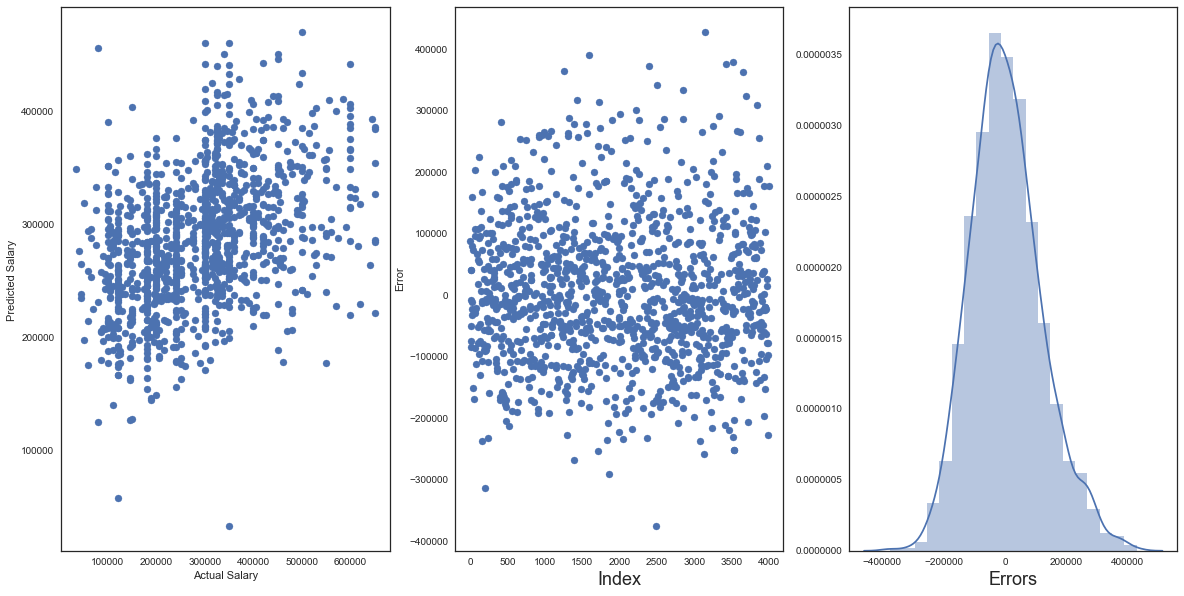

In [164]:
fig = plt.figure()
plt.figure(figsize = (20, 10))
plt.subplot(1,3,1)
plt.scatter(y_test,y_pred)
fig.suptitle('Actual  vs Predicted ', fontsize=20)              
plt.xlabel('Actual Salary')                          
plt.ylabel('Predicted Salary ')  
plt.subplot(1,3,2)
plt.scatter(y_test.index,(y_test - y_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Index', fontsize = 18) 
plt.ylabel('Error')
plt.subplot(1,3,3)
sns.distplot((y_test - y_pred), bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Text(0,0.5,'Error')

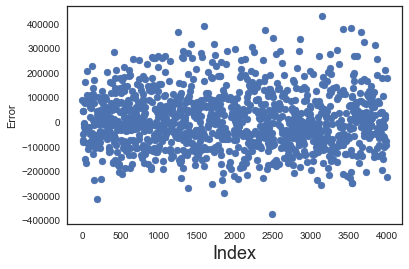

In [165]:
## Residual plot
plt.scatter(y_test.index,(y_test - y_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Index', fontsize = 18) 
plt.ylabel('Error')

Text(0.5,0,'Errors')

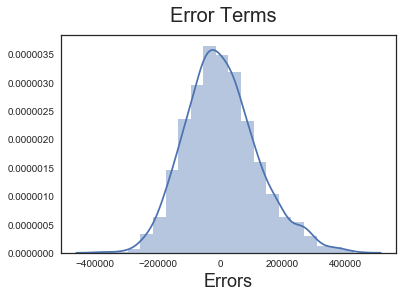

In [166]:
fig = plt.figure()
sns.distplot((y_test - y_pred), bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

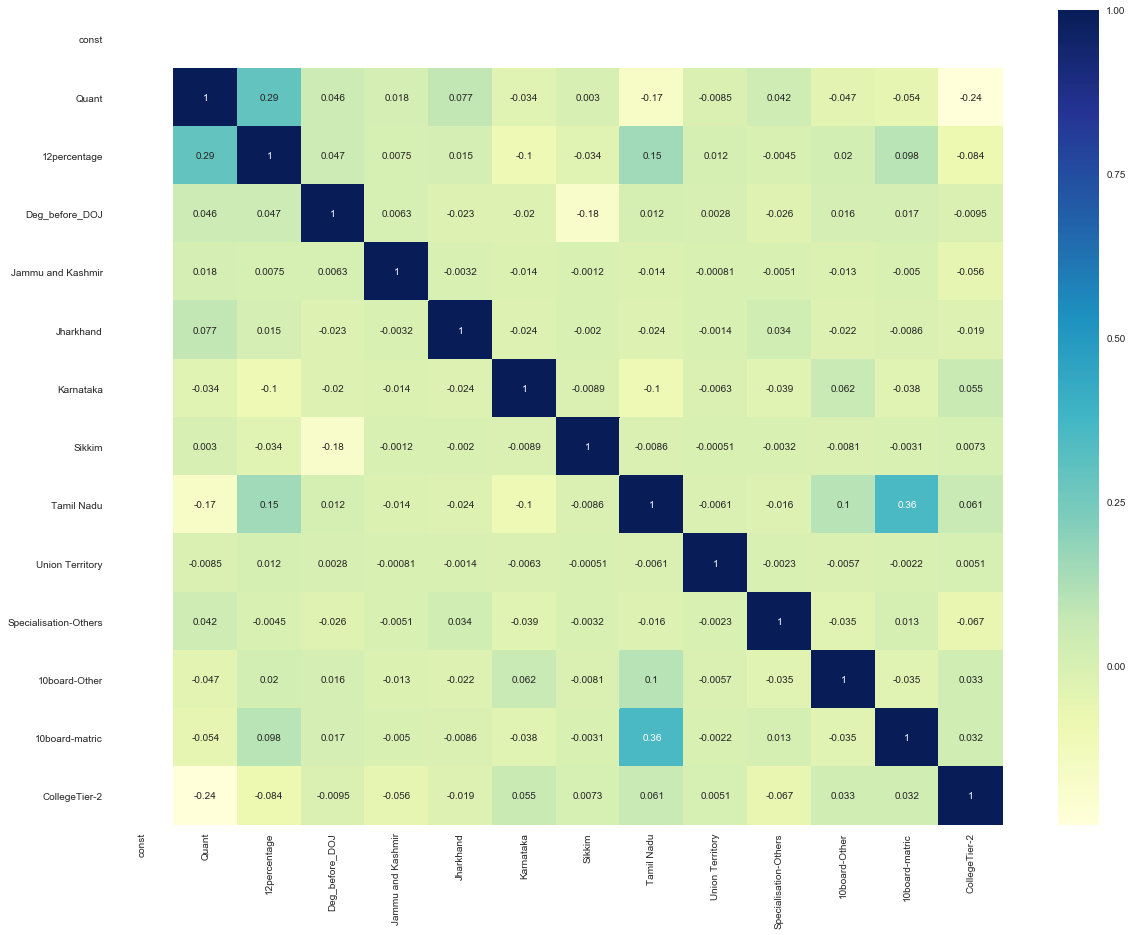

In [167]:
### Correlation Matrix

plt.figure(figsize = (20, 15))
sns.heatmap(X_mod.corr(), annot = True, cmap="YlGnBu")
plt.show()

### 2. Build Model - Backward

In [168]:
X_train.shape

(2751, 71)

In [169]:
X_test.shape

(1179, 71)

In [170]:
X_mod_2=X_train.copy()
X_mod_2 = sm.add_constant(X_mod_2)
y_mod_2=y_train
linear_m1_bk = sm.OLS(y_mod_2,X_mod_2).fit()
linear_m1_bk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     21.13
Date:                Mon, 04 May 2020   Prob (F-statistic):          1.02e-187
Time:                        18:59:49   Log-Likelihood:                -35662.
No. Observations:                2751   AIC:                         7.145e+04
Df Residuals:                    2687   BIC:                         7.183e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                     -4.994e+17   1.96e+17     -2.550      0.011   -8.84e+17   -1.15e+17
Gender                                    -2.532e+04   4943.717     -5.122      0.000    -3.5e+04   -1.56e+04
10percentage                               1.177e+04   2952.965      3.986      0.000    5980.522    1.76e+04
12percentage                               1.715e+04   3332.089      5.146      0.000    1.06e+04    2.37e+04
collegeGPA                                  2.09e+04   2643.760      7.905      0.000    1.57e+04    2.61e+04
CollegeCityTier                           -2895.6721   6719.372     -0.431      0.667   -1.61e+04    1.03e+04
English                                    1.347e+04   2483.053      5.423      0.000    8597.445    1.83e+04
Logical                                    2718.0155   2555.305      1.064      0.288   -2292.548    7728.579
Quant                                      1.696e+04   2658.004      6.380      0.000    1.17e+04    2.22e+04
Domain                                     7251.3849   2290.902      3.165      0.002    2759.277    1.17e+04
conscientiousness                         -6063.8073   2510.096     -2.416      0.016    -1.1e+04   -1141.893
agreeableness                               707.9520   2840.784      0.249      0.803   -4862.391    6278.295
extraversion                               2900.2661   2400.422      1.208      0.227   -1806.594    7607.126
nueroticism                               -1738.6615   2191.939     -0.793      0.428   -6036.720    2559.397
openess_to_experience                     -2427.9918   2599.215     -0.934      0.350   -7524.655    2668.672
gap_12_college_graduation                 -6961.7698   2999.950     -2.321      0.020   -1.28e+04   -1079.326
Deg_before_DOJ                             4.985e+04    1.6e+04      3.124      0.002    1.86e+04    8.11e+04
Age_DOJ_Job                                1.058e+04   2562.847      4.130      0.000    5558.325    1.56e+04
GDP-constant                              -3.066e+04   2234.307    -13.724      0.000    -3.5e+04   -2.63e+04
B.Tech/B.E.                                2.873e+17   1.13e+17      2.550      0.011    6.64e+16    5.08e+17
M.Sc. (Tech.)                              2.873e+17   1.13e+17      2.550      0.011    6.64e+16    5.08e+17
M.Tech./M.E.                               2.873e+17   1.13e+17      2.550      0.011    6.64e+16    5.08e+17
MCA                                        2.873e+17   1.13e+17      2.550      0.011    6.64e+16    5.08e+17
Andhra Pradesh                            -2.254e+16   8.84e+15     -2.550      0.011   -3.99e+16    -5.2e+15
Assam                                     -2.254e+16   8.84e+15     -2.550      0.011   -3.99e+16    -5.2e+15
Bih

In [171]:
cols_bk_lr=[ 'Gender', '10percentage', '12percentage', 'collegeGPA',
       'CollegeCityTier', 'English', 'Logical', 'Quant', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'B.Tech/B.E.', 'M.Sc. (Tech.)', 'M.Tech./M.E.',
       'MCA', 'Andhra Pradesh',  'Bihar', 'Chhattisgarh', 'Delhi',
       'Goa', 'Gujarat', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Madhya Pradesh', 'Maharashtra',
       'Meghalaya',  'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Union Territory',  'Uttarakhand',
       'West Bengal', 'JobCityTier-Other', 'JobCityTier-Tier_1',
        'Specialisation-Biotech',
       'Specialisation-Computer', 
       'Specialisation-Electronics', 'Specialisation-IT',
       'Specialisation-Mechanical',  '10board-Other',
       '10board-cbse', '10board-icse', '10board-matric', '10board-state',
       '12board-IB', '12board-Other', '12board-cbse', '12board-icse',
       '12board-state', 'gap_12_college_graduation', 'Deg_before_DOJ',
       'Age_DOJ_Job', 'GDP-constant', 'CollegeTier-1', 'CollegeTier-2']

In [172]:
X_mod_2=X_train[cols_bk_lr]
X_mod_2 = sm.add_constant(X_mod_2)
y_mod_2=y_train
linear_m2_bk = sm.OLS(y_mod_2,X_mod_2).fit()
linear_m2_bk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     23.16
Date:                Mon, 04 May 2020   Prob (F-statistic):          8.30e-190
Time:                        18:59:49   Log-Likelihood:                -35667.
No. Observations:                2751   AIC:                         7.145e+04
Df Residuals:                    2693   BIC:                         7.179e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -4.919e+17   2.21e+17     -2.222      0.026   -9.26e+17   -5.77e+16
Gender                     -2.538e+04   4936.653     -5.141      0.000   -3.51e+04   -1.57e+04
10percentage                1.143e+04   2915.012      3.923      0.000    5718.619    1.72e+04
12percentage                1.719e+04   3278.984      5.244      0.000    1.08e+04    2.36e+04
collegeGPA                  2.082e+04   2599.634      8.010      0.000    1.57e+04    2.59e+04
CollegeCityTier            -2654.0914   6722.071     -0.395      0.693   -1.58e+04    1.05e+04
English                     1.348e+04   2480.695      5.434      0.000    8616.508    1.83e+04
Logical                     2795.0319   2554.233      1.094      0.274   -2213.423    7803.487
Quant                       1.702e+04   2652.897      6.415      0.000    1.18e+04    2.22e+04
Domain                      7378.5261   2291.903      3.219      0.001    2884.460    1.19e+04
conscientiousness          -6186.3888   2510.761     -2.464      0.014   -1.11e+04   -1263.174
agreeableness                397.6708   2839.804      0.140      0.889   -5170.746    5966.087
extraversion                2905.7509   2398.242      1.212      0.226   -1796.831    7608.333
nueroticism                -1596.5072   2187.993     -0.730      0.466   -5886.824    2693.809
openess_to_experience      -2118.7525   2597.680     -0.816      0.415   -7212.401    2974.896
B.Tech/B.E.                 2.479e+17   1.12e+17      2.222      0.026    2.91e+16    4.67e+17
M.Sc. (Tech.)               2.479e+17   1.12e+17      2.222      0.026    2.91e+16    4.67e+17
M.Tech./M.E.                2.479e+17   1.12e+17      2.222      0.026    2.91e+16    4.67e+17
MCA                         2.479e+17   1.12e+17      2.222      0.026    2.91e+16    4.67e+17
Andhra Pradesh             -1.474e+04   1.03e+04     -1.424      0.155    -3.5e+04    5554.241
Bihar                        1.97e+04   4.02e+04      0.490      0.624   -5.91e+04    9.85e+04
Chhattisgarh               -6643.3319   2.33e+04     -0.285      0.775   -5.23e+04     3.9e+04
Delhi                      -1.245e+04    1.4e+04     -0.886      0.376      -4e+04    1.51e+04
Goa                         2.246e+15   1.01e+15      2.222      0.026    2.64e+14    4.23e+15
Gujarat                    -6.371e+04   2.87e+04     -2.222      0.026    -1.2e+05   -7499.227
Himachal Pradesh              2.6e+04    3.2e+04      0.813      0.416   -3.67e+04    8.87e+04
Jammu and Kashmir           5.237e+04   4.72e+04      1.109      0.267   -4.02e+04    1.45e+05
Jharkhand                   7.126e+04   2.75e+04      2.587      0.010    1.72e+04    1.25e+05
Karnataka                   1.152e+04   9140.712      1.260      0.208   -6404.400    2.94e+04
Madhya Pradesh              8204.6194   996

In [173]:
cols_bk_lr=[ 'Gender', '10percentage', '12percentage', 'collegeGPA',
       'CollegeCityTier', 'English', 'Logical', 'Quant', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 
       'openess_to_experience', 'B.Tech/B.E.',  'M.Tech./M.E.',
        'Andhra Pradesh',  'Bihar',  'Delhi',
       'Goa', 'Gujarat',  'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Madhya Pradesh', 'Maharashtra',
         'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Union Territory',  'Uttarakhand',
       'West Bengal', 'JobCityTier-Other', 'JobCityTier-Tier_1',
        'Specialisation-Computer', 
       'Specialisation-Electronics', 'Specialisation-IT',
       'Specialisation-Mechanical',  '10board-Other',
       '10board-cbse', '10board-icse', '10board-matric', '10board-state',
       '12board-IB', '12board-cbse', 
       '12board-state', 'gap_12_college_graduation', 'Deg_before_DOJ',
       'Age_DOJ_Job', 'GDP-constant', 'CollegeTier-1', 'CollegeTier-2']

In [174]:
X_mod_2=X_train[cols_bk_lr]
X_mod_2 = sm.add_constant(X_mod_2)
y_mod_2=y_train
linear_m3_bk = sm.OLS(y_mod_2,X_mod_2).fit()
linear_m3_bk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     27.15
Date:                Mon, 04 May 2020   Prob (F-statistic):          2.18e-196
Time:                        18:59:49   Log-Likelihood:                -35664.
No. Observations:                2751   AIC:                         7.143e+04
Df Residuals:                    2701   BIC:                         7.172e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -4.576e+17   2.43e+17     -1.887      0.059   -9.33e+17     1.8e+16
Gender                     -2.527e+04   4914.869     -5.142      0.000   -3.49e+04   -1.56e+04
10percentage                1.133e+04   2902.113      3.903      0.000    5637.651     1.7e+04
12percentage                1.736e+04   3271.492      5.305      0.000    1.09e+04    2.38e+04
collegeGPA                  2.054e+04   2586.685      7.940      0.000    1.55e+04    2.56e+04
CollegeCityTier            -2737.8597   6704.831     -0.408      0.683   -1.59e+04    1.04e+04
English                     1.368e+04   2470.964      5.537      0.000    8837.356    1.85e+04
Logical                     3184.3990   2532.410      1.257      0.209   -1781.260    8150.057
Quant                       1.731e+04   2636.620      6.564      0.000    1.21e+04    2.25e+04
Domain                      7079.7222   2280.892      3.104      0.002    2607.252    1.16e+04
conscientiousness          -5742.6079   2395.059     -2.398      0.017   -1.04e+04   -1046.274
agreeableness                405.9073   2821.439      0.144      0.886   -5126.491    5938.305
extraversion                2965.6217   2393.671      1.239      0.215   -1727.991    7659.234
openess_to_experience      -2324.9276   2575.101     -0.903      0.367   -7374.295    2724.440
B.Tech/B.E.                 1.245e+04   1.09e+04      1.140      0.254   -8958.820    3.39e+04
M.Tech./M.E.                7509.5999      2e+04      0.375      0.708   -3.18e+04    4.68e+04
Andhra Pradesh             -1.526e+04   1.02e+04     -1.491      0.136   -3.53e+04    4813.133
Bihar                        2.08e+04      4e+04      0.519      0.603   -5.77e+04    9.93e+04
Delhi                      -1.427e+04   1.39e+04     -1.029      0.304   -4.15e+04    1.29e+04
Goa                          1.52e+14   8.05e+13      1.887      0.059   -5.97e+12     3.1e+14
Gujarat                    -6.423e+04   2.86e+04     -2.248      0.025    -1.2e+05   -8214.632
Jammu and Kashmir           5.047e+04   4.71e+04      1.073      0.284   -4.18e+04    1.43e+05
Jharkhand                   6.944e+04   2.74e+04      2.533      0.011    1.57e+04    1.23e+05
Karnataka                   1.116e+04   8997.015      1.240      0.215   -6484.423    2.88e+04
Madhya Pradesh              7961.4092   9826.793      0.810      0.418   -1.13e+04    2.72e+04
Maharashtra                -2762.8213   9819.908     -0.281      0.778    -2.2e+04    1.65e+04
Rajasthan                   6189.8040   1.09e+04      0.568      0.570   -1.52e+04    2.76e+04
Sikkim                      1.555e+05   7.63e+04      2.038      0.042    5856.570    3.05e+05
Tamil Nadu                 -4.527e+04   9236.270     -4.901      0.000   -6.34e+04   -2.72e+04
Telangana                  -2.567e+04   1.1

In [175]:
cols_bk_lr=[ 'Gender', '10percentage', '12percentage', 'collegeGPA',
        'English', 'Logical', 'Quant', 'Domain',
       'conscientiousness', 'agreeableness',    'openess_to_experience', 'B.Tech/B.E.',  'M.Tech./M.E.',
        'Andhra Pradesh',  'Bihar',  'Delhi',
       'Goa', 'Gujarat',  'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Union Territory',  'Uttarakhand',
       'West Bengal', 'JobCityTier-Other', 'JobCityTier-Tier_1',
        'Specialisation-Computer', 
       'Specialisation-Electronics', 'Specialisation-IT',
       'Specialisation-Mechanical',  '10board-Other',
       '10board-cbse', '10board-icse', '10board-matric', '10board-state',
       '12board-IB', '12board-cbse', 
       '12board-state', 'gap_12_college_graduation', 'Deg_before_DOJ',
       'Age_DOJ_Job', 'GDP-constant', 'CollegeTier-1', 'CollegeTier-2']

In [176]:
X_mod_2=X_train[cols_bk_lr]
X_mod_2 = sm.add_constant(X_mod_2)
y_mod_2=y_train
linear_m4_bk = sm.OLS(y_mod_2,X_mod_2).fit()
linear_m4_bk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     30.02
Date:                Mon, 04 May 2020   Prob (F-statistic):          2.28e-198
Time:                        18:59:50   Log-Likelihood:                -35668.
No. Observations:                2751   AIC:                         7.143e+04
Df Residuals:                    2706   BIC:                         7.169e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -4.672e+17   2.41e+17     -1.937      0.053    -9.4e+17     5.8e+15
Gender                     -2.623e+04   4915.315     -5.336      0.000   -3.59e+04   -1.66e+04
10percentage                1.129e+04   2888.910      3.908      0.000    5624.959     1.7e+04
12percentage                1.734e+04   3266.319      5.309      0.000    1.09e+04    2.37e+04
collegeGPA                    2.1e+04   2472.580      8.495      0.000    1.62e+04    2.59e+04
English                     1.349e+04   2466.583      5.468      0.000    8651.814    1.83e+04
Logical                     2982.0402   2524.228      1.181      0.238   -1967.569    7931.649
Quant                       1.748e+04   2633.823      6.636      0.000    1.23e+04    2.26e+04
Domain                      7125.7690   2272.300      3.136      0.002    2670.150    1.16e+04
conscientiousness          -5155.0701   2367.121     -2.178      0.030   -9796.618    -513.522
agreeableness               1242.3654   2735.213      0.454      0.650   -4120.952    6605.683
openess_to_experience      -1704.9368   2521.331     -0.676      0.499   -6648.866    3238.993
B.Tech/B.E.                 1.281e+04   1.09e+04      1.178      0.239   -8521.011    3.41e+04
M.Tech./M.E.                6347.7195      2e+04      0.317      0.751   -3.29e+04    4.56e+04
Andhra Pradesh             -1.589e+04   9810.029     -1.619      0.105   -3.51e+04    3348.939
Bihar                       1.836e+04      4e+04      0.459      0.646   -6.01e+04    9.68e+04
Delhi                       -1.77e+04    1.2e+04     -1.470      0.142   -4.13e+04    5905.052
Goa                         5.897e+14   3.04e+14      1.937      0.053   -7.32e+12    1.19e+15
Gujarat                    -6.383e+04   2.84e+04     -2.247      0.025    -1.2e+05   -8123.410
Jammu and Kashmir           4.894e+04    4.7e+04      1.040      0.298   -4.33e+04    1.41e+05
Jharkhand                   6.782e+04   2.74e+04      2.477      0.013    1.41e+04    1.21e+05
Karnataka                   9288.6040   7489.161      1.240      0.215   -5396.449     2.4e+04
Sikkim                      1.565e+05   7.63e+04      2.051      0.040    6860.958    3.06e+05
Tamil Nadu                 -4.685e+04   8418.591     -5.566      0.000   -6.34e+04   -3.03e+04
Telangana                  -2.839e+04   8872.123     -3.200      0.001   -4.58e+04    -1.1e+04
Union Territory             -1.56e+05   1.05e+05     -1.491      0.136   -3.61e+05    4.92e+04
Uttarakhand                 1.874e+04   1.24e+04      1.517      0.129   -5488.241     4.3e+04
West Bengal                -4.833e+04   9810.254     -4.926      0.000   -6.76e+04   -2.91e+04
JobCityTier-Other           1.019e+05   7.51e+04      1.358      0.175   -4.53e+04    2.49e+05
JobCityTier-Tier_1          3.369e+04   441

In [177]:
# Calculate the VIFs 
vif = pd.DataFrame()
X_vif = X_train.copy()
X_vif=X_vif[cols_bk_lr]
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
46  CollegeTier-2               inf  
45  CollegeTier-1               inf  
35  10board-icse                inf  
34  10board-cbse                inf  
33  10board-Other               inf  
37  10board-state               inf  
36  10board-matric              inf  
40  12board-state               12.78
39  12board-cbse                10.98
29  Specialisation-Computer     6.68 
30  Specialisation-Electronics  6.13 
31  Specialisation-IT           4.45 
2   12percentage                2.69 
32  Specialisation-Mechanical   2.28 
41  gap_12_college_graduation   2.19 
1   10percentage                2.11 
11  B.Tech/B.E.                 1.99 
9   agreeableness               1.89 
6   Quant                       1.75 
5   Logical                     1.61 
43  Age_DOJ_Job                 1.61 
10  openess_to_experience       1.61 
3   collegeGPA                  1.55 
4   English                     1.54 
22  Tamil Nadu                  1.50 
23  Telangana                   1.46 
8   conscientiousness           1.42 
12  M.Tech./M.E.                1.38 
15  Delhi                       1.37 
13  Andhra Pradesh              1.34 
7   Domain                      1.30 
42  Deg_before_DOJ              1.29 
20  Karnataka                   1.25 
28  JobCityTier-Tier_1          1.22 
26  West Bengal                 1.22 
44  GDP-constant                1.22 
0   Gender                      1.16 
21  Sikkim                      1.07 
27  JobCityTier-Other           1.04 
25  Uttarakhand                 1.04 
38  12board-IB                  1.03 
19  Jharkhand                   1.03 
17  Gujarat                     1.03 
14  Bihar                       1.03 
18  Jammu and Kashmir           1.02 
24  Union Territory             1.01 
16  Goa                        NaN

In [178]:
cols_bk_lr=[ 'Gender', '10percentage', '12percentage', 'collegeGPA',
        'English', 'Logical', 'Quant', 'Domain',
       'conscientiousness', 'agreeableness',    'openess_to_experience',  'M.Tech./M.E.',
        'Andhra Pradesh',  'Bihar',  'Delhi',
       'Goa', 'Gujarat',  'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Union Territory',  'Uttarakhand',
       'West Bengal', 'JobCityTier-Other', 'JobCityTier-Tier_1',
        'Specialisation-Computer', 
       'Specialisation-Electronics', 'Specialisation-IT',
       'Specialisation-Mechanical',   '10board-cbse',   '10board-state',
        '12board-cbse',      'gap_12_college_graduation', 
       'Age_DOJ_Job', 'GDP-constant', 'CollegeTier-1']

In [179]:
X_mod_2=X_train[cols_bk_lr]
X_mod_2 = sm.add_constant(X_mod_2)
y_mod_2=y_train
linear_m5_bk = sm.OLS(y_mod_2,X_mod_2).fit()
linear_m5_bk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     34.38
Date:                Mon, 04 May 2020   Prob (F-statistic):          1.92e-200
Time:                        18:59:52   Log-Likelihood:                -35674.
No. Observations:                2751   AIC:                         7.143e+04
Df Residuals:                    2712   BIC:                         7.166e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         2.7e+05   1.17e+04     23.145      0.000    2.47e+05    2.93e+05
Gender                     -2.526e+04   4903.353     -5.152      0.000   -3.49e+04   -1.56e+04
10percentage                1.201e+04   2870.295      4.184      0.000    6382.393    1.76e+04
12percentage                1.669e+04   3251.899      5.133      0.000    1.03e+04    2.31e+04
collegeGPA                  2.072e+04   2432.883      8.515      0.000    1.59e+04    2.55e+04
English                     1.244e+04   2429.842      5.120      0.000    7677.329    1.72e+04
Logical                     2985.6566   2515.883      1.187      0.235   -1947.584    7918.898
Quant                       1.787e+04   2615.530      6.834      0.000    1.27e+04     2.3e+04
Domain                      7361.4161   2270.889      3.242      0.001    2908.567    1.18e+04
conscientiousness          -5312.1342   2367.665     -2.244      0.025   -9954.745    -669.524
agreeableness               1158.2206   2737.121      0.423      0.672   -4208.834    6525.275
openess_to_experience      -1592.7799   2523.423     -0.631      0.528   -6540.807    3355.247
M.Tech./M.E.               -1.588e+04   1.83e+04     -0.869      0.385   -5.17e+04       2e+04
Andhra Pradesh             -1.661e+04   9733.967     -1.706      0.088   -3.57e+04    2476.470
Bihar                       2.277e+04      4e+04      0.569      0.569   -5.57e+04    1.01e+05
Delhi                      -1.864e+04    1.2e+04     -1.553      0.121   -4.22e+04    4896.682
Goa                        -7.405e-11   1.75e-10     -0.424      0.671   -4.16e-10    2.68e-10
Gujarat                    -6.539e+04   2.84e+04     -2.300      0.021   -1.21e+05   -9653.151
Jammu and Kashmir           4.644e+04   4.71e+04      0.987      0.324   -4.59e+04    1.39e+05
Jharkhand                   6.091e+04   2.73e+04      2.229      0.026    7321.708    1.14e+05
Karnataka                   7589.3540   7456.457      1.018      0.309   -7031.558    2.22e+04
Sikkim                      1.037e+05   7.45e+04      1.391      0.164   -4.25e+04     2.5e+05
Tamil Nadu                 -4.826e+04   7981.054     -6.047      0.000   -6.39e+04   -3.26e+04
Telangana                  -2.952e+04   8823.419     -3.346      0.001   -4.68e+04   -1.22e+04
Union Territory            -1.567e+05   1.05e+05     -1.496      0.135   -3.62e+05    4.87e+04
Uttarakhand                 1.787e+04   1.24e+04      1.445      0.148   -6370.345    4.21e+04
West Bengal                -5.002e+04   9785.611     -5.112      0.000   -6.92e+04   -3.08e+04
JobCityTier-Other           9.761e+04   7.47e+04      1.306      0.192   -4.89e+04    2.44e+05
JobCityTier-Tier_1          3.403e+04   4410.428      7.716      0.000    2.54e+04    4.27e+04
Specialisation-Computer     2.331e+04   1.0

In [180]:
cols_bk_lr=[ 'Gender', 'collegeGPA',
        'Quant', 'Domain',     'conscientiousness',  'M.Tech./M.E.',
        'Andhra Pradesh',  'Bihar',    'Goa', 'Gujarat',  'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Sikkim',   'Union Territory',  'Uttarakhand',
        'JobCityTier-Other', 'JobCityTier-Tier_1',     'Specialisation-Computer', 
       'Specialisation-Electronics', 'Specialisation-IT',
       'Specialisation-Mechanical',   '10board-state',     '12board-cbse',        'Age_DOJ_Job', 'GDP-constant', 'CollegeTier-1']
X_mod_2=X_train[cols_bk_lr]
X_mod_2 = sm.add_constant(X_mod_2)
y_mod_2=y_train
linear_m6_bk = sm.OLS(y_mod_2,X_mod_2).fit()
linear_m6_bk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     38.41
Date:                Mon, 04 May 2020   Prob (F-statistic):          2.27e-163
Time:                        18:59:52   Log-Likelihood:                -35786.
No. Observations:                2751   AIC:                         7.163e+04
Df Residuals:                    2724   BIC:                         7.179e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.534e+05   1.16e+04     21.938      0.000    2.31e+05    2.76e+05
Gender                     -1.379e+04   4965.064     -2.777      0.006   -2.35e+04   -4054.163
collegeGPA                  2.264e+04   2258.448     10.023      0.000    1.82e+04    2.71e+04
Quant                       2.992e+04   2379.612     12.572      0.000    2.52e+04    3.46e+04
Domain                      1.221e+04   2296.945      5.317      0.000    7708.369    1.67e+04
conscientiousness          -4532.6069   2109.193     -2.149      0.032   -8668.386    -396.828
M.Tech./M.E.               -3.832e+04   1.83e+04     -2.099      0.036   -7.41e+04   -2529.044
Andhra Pradesh              1.945e+04   9187.117      2.118      0.034    1440.363    3.75e+04
Bihar                       2.441e+04   4.14e+04      0.590      0.555   -5.67e+04    1.06e+05
Goa                         -1.59e-10   8.09e-11     -1.966      0.049   -3.18e-10   -3.92e-13
Gujarat                    -4.253e+04   2.93e+04     -1.453      0.146   -9.99e+04    1.49e+04
Jammu and Kashmir            7.08e+04   4.88e+04      1.451      0.147   -2.49e+04    1.66e+05
Jharkhand                   7.457e+04   2.83e+04      2.638      0.008    1.91e+04     1.3e+05
Karnataka                   2.721e+04   7230.528      3.763      0.000     1.3e+04    4.14e+04
Sikkim                      8.417e+04   7.71e+04      1.092      0.275   -6.69e+04    2.35e+05
Union Territory            -1.325e+05   1.09e+05     -1.220      0.223   -3.45e+05    8.05e+04
Uttarakhand                 1.472e+04   1.28e+04      1.154      0.249   -1.03e+04    3.97e+04
JobCityTier-Other           9.423e+04   7.71e+04      1.222      0.222    -5.7e+04    2.45e+05
JobCityTier-Tier_1          3.559e+04   4411.758      8.067      0.000    2.69e+04    4.42e+04
Specialisation-Computer     1.787e+04   1.07e+04      1.664      0.096   -3183.848    3.89e+04
Specialisation-Electronics  1.719e+04   1.08e+04      1.591      0.112   -3997.775    3.84e+04
Specialisation-IT           3.606e+04   1.14e+04      3.172      0.002    1.38e+04    5.83e+04
Specialisation-Mechanical   1.863e+04   1.36e+04      1.374      0.170   -7964.175    4.52e+04
10board-state               -2.74e+04   5458.007     -5.020      0.000   -3.81e+04   -1.67e+04
12board-cbse                -745.8312   5862.167     -0.127      0.899   -1.22e+04    1.07e+04
Age_DOJ_Job                 -944.6430   2157.181     -0.438      0.661   -5174.520    3285.234
GDP-constant               -2.582e+04   2149.730    -12.012      0.000      -3e+04   -2.16e+04
CollegeTier-1               4.102e+04   8699.605      4.715      0.000     2.4e+04    5.81e+04
==============================================================================
Omnibus:                       23.896   Durbin-Watson:     

In [181]:
##X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test_new_bk=X_test[cols_bk_lr]
X_test_new_bk=sm.add_constant(X_test_new_bk, prepend=True, has_constant='add')


In [182]:
y_pred_bk=linear_m6_bk.predict(X_test_new_bk)

In [183]:
lr_bk_RMSE=sqrt(mean_squared_error(y_test,y_pred_bk))
lr_bk_RMSE

111782.14245532059

In [184]:
mean_absolute_error(y_test,y_pred_bk)

87436.36000597758

In [185]:
MAPE_lr_bk=np.mean(np.abs((y_test - y_pred_bk) / y_test)) * 100
MAPE_lr_bk

42.01824737547926

Text(0.5,0,'Errors')

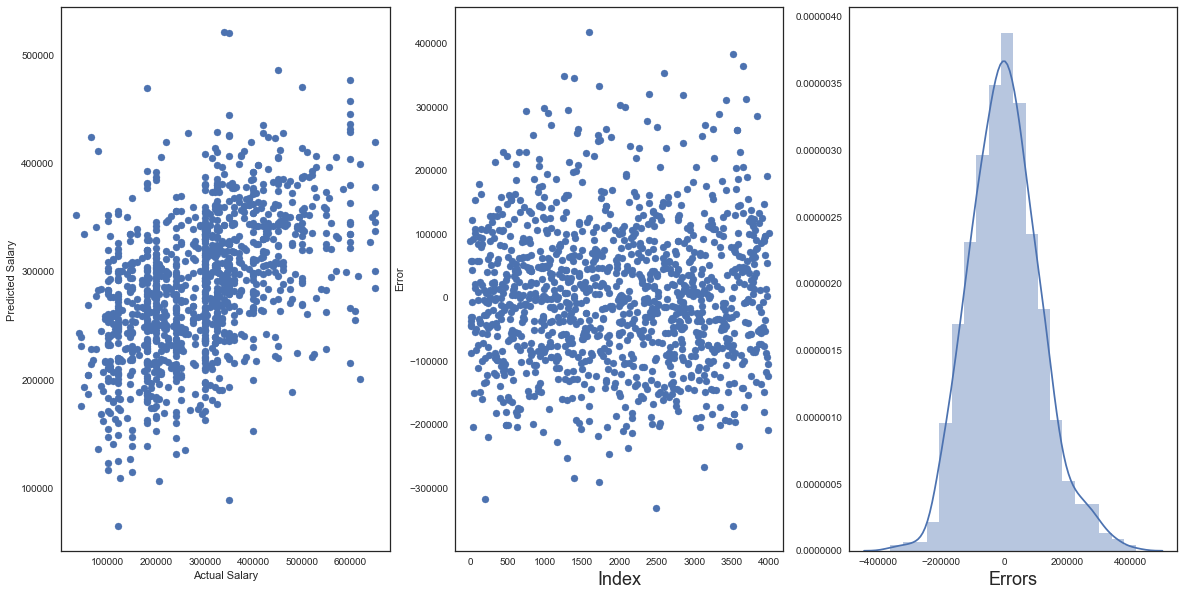

In [186]:
plt.figure(figsize = (20, 10))
plt.subplot(1,3,1)
plt.scatter(y_test,y_pred_bk)
fig.suptitle('Actual  vs Predicted ', fontsize=20)              
plt.xlabel('Actual Salary')                          
plt.ylabel('Predicted Salary ')  
plt.subplot(1,3,2)
plt.scatter(y_test.index,(y_test - y_pred_bk))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Index', fontsize = 18) 
plt.ylabel('Error')
plt.subplot(1,3,3)
sns.distplot((y_test - y_pred_bk), bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

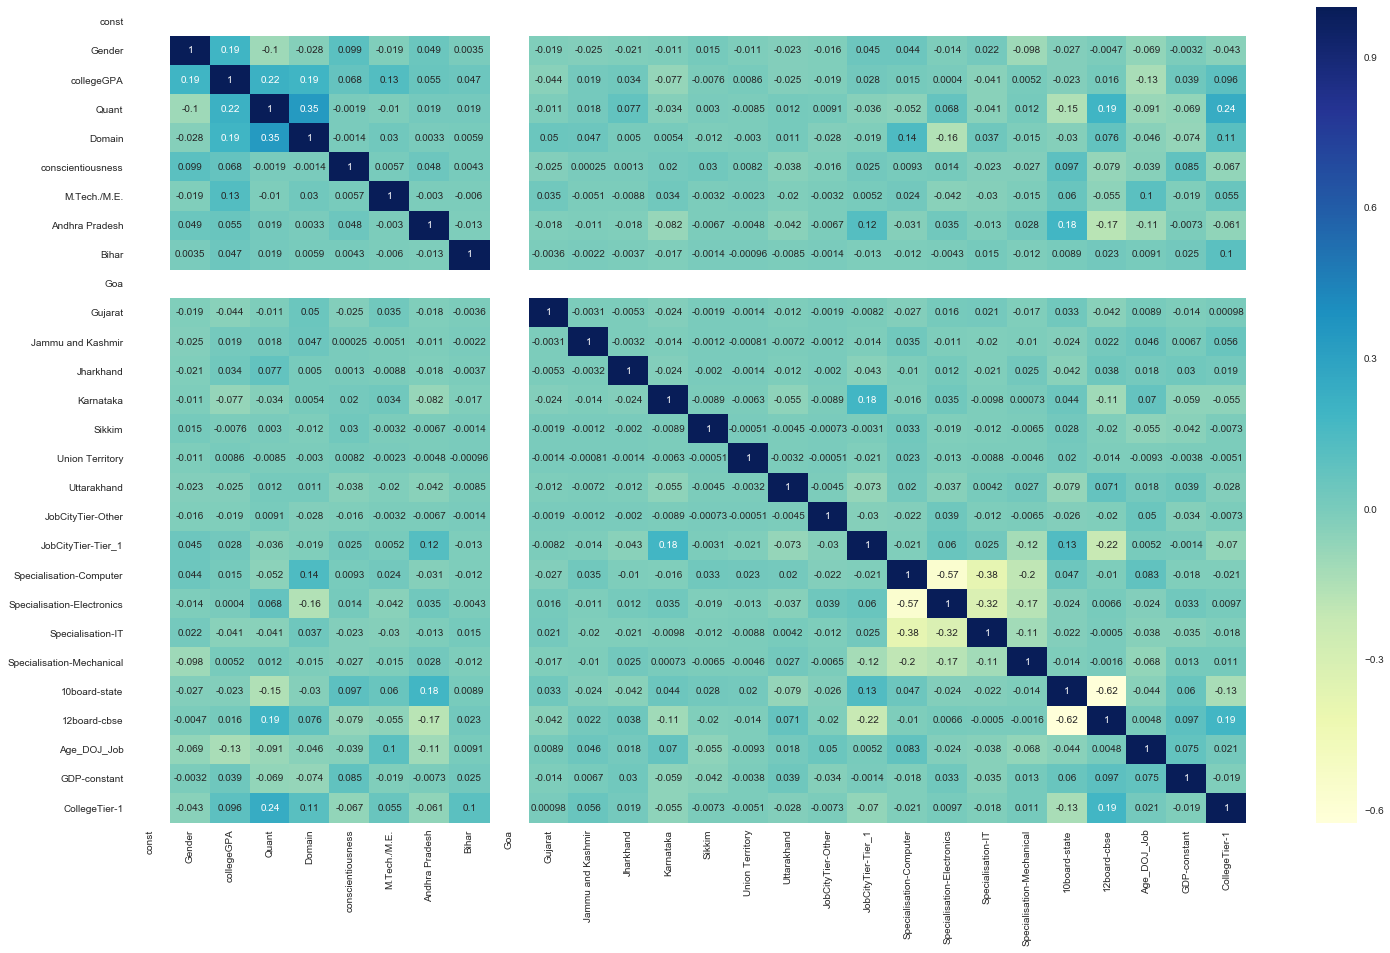

In [187]:
### Correlation Matrix

plt.figure(figsize = (25, 15))
sns.heatmap(X_mod_2.corr(), annot = True, cmap="YlGnBu")
plt.show()

Text(0,0.5,'Error')

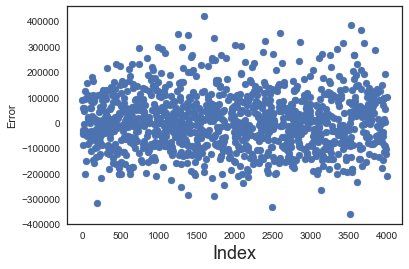

In [188]:
## Residual plot
plt.scatter(y_test.index,(y_test - y_pred_bk))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Index', fontsize = 18) 
plt.ylabel('Error')

Text(0.5,0,'Errors')

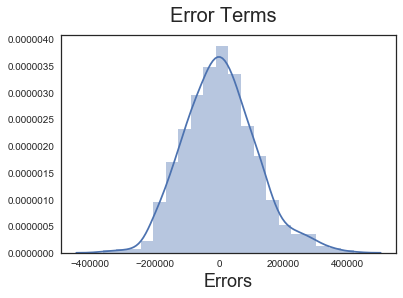

In [189]:
fig = plt.figure()
sns.distplot((y_test - y_pred_bk), bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

### Build Model - Embedded Feature Selection - Lasso

In [190]:
X_train.shape

(2751, 71)

In [191]:
X_test.shape

(1179, 71)

In [192]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
from sklearn.metrics import make_scorer
#mape_scorer=make_scorer(mean_abs_percentage_error)
#rmse_scorer=make_scorer(root_mean_squared_error)
#scoring_params=['mape_scorer','mean_absolute_error','rmse_scorer']

scoring_params=['neg_mean_absolute_error','neg_mean_squared_error']
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
folds = 5

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= scoring_params, 
                        cv = folds, 
                        refit = 'neg_mean_absolute_error',
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   35.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit='neg_mean_absolute_error',
             return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [193]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0  0.448144       0.126608      0.003998         0.001548        0.0001       
1  0.370783       0.024409      0.003202         0.000398        0.001        
2  0.388380       0.056467      0.003603         0.000802        0.01         
3  0.364988       0.010678      0.003002         0.000006        0.05         
4  0.363077       0.009525      0.003209         0.000395        0.1          

              params  split0_test_neg_mean_absolute_error  \
0  {'alpha': 0.0001} -85395.988556                          
1  {'alpha': 0.001}  -85395.984927                          
2  {'alpha': 0.01}   -85395.949922                          
3  {'alpha': 0.05}   -85395.777253                          
4  {'alpha': 0.1}    -85395.565548                          

   split1_test_neg_mean_absolute_error  split2_test_neg_mean_absolute_error  \
0 -79985.476155                        -86797.688489                          
1 -79985.482230                        -86797.657432                          
2 -79985.542979                        -86797.346868                          
3 -79985.799261                        -86795.966583                          
4 -79986.129424                        -86794.229743                          

   split3_test_neg_mean_absolute_error  split4_test_neg_mean_absolute_error  \
0 -83993.959373                        -82813.851157                          
1 -83993.970786                        -82813.890751                          
2 -83994.084915                        -82814.290201                          
3 -83994.592157                        -82815.745756                          
4 -83995.226209                        -82817.571148                          

   mean_test_neg_mean_absolute_error  std_test_neg_mean_absolute_error  \
0 -83797.392746                       2327.830909                        
1 -83797.397225                       2327.817262                        
2 -83797.442977                       2327.680684                        
3 -83797.576202                       2327.102973                        
4 -83797.744414                       2326.375044                        

   rank_test_neg_mean_absolute_error  split0_train_neg_mean_absolute_error  \
0  9                                 -80741.926013                           
1  10                                -80741.928946                           
2  11                                -80741.955449                           
3  13                                -80742.064895                           
4  14                                -80742.204103                           

   split1_train_neg_mean_absolute_error  split2_train_neg_mean_absolute_error  \
0 -82404.064995                         -80332.982758                           
1 -82404.069782                         -80332.987845                           
2 -82404.117660                         -80333.038717                           
3 -82404.338087                         -80333.264813                           
4 -82404.611429                         -80333.514120                           

   split3_train_neg_mean_absolute_error  split4_train_neg_mean_absolute_error  \
0 -81192.530076                         -81460.590449                           
1 -81192.533676                         -81460.594873                           
2 -81192.569674                         -81460.638988                           
3 -81192.729663                         -81460.834973                           
4 -81192.929649                         -81461.079185                           

   mean_train_neg_mean_absolute_error  std_train_neg_mean_absolute_error  \
0 -81226.418858                        703.675577                          
1 -81226.423025                        703.675743                          
2 -81226.464097                        703.677791                          
3 -81226.646486    

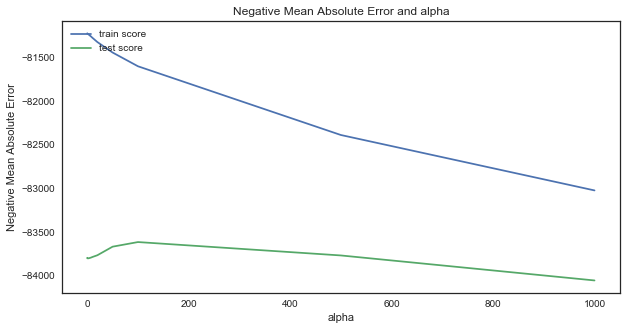

In [194]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(10,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_neg_mean_absolute_error'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_neg_mean_absolute_error'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

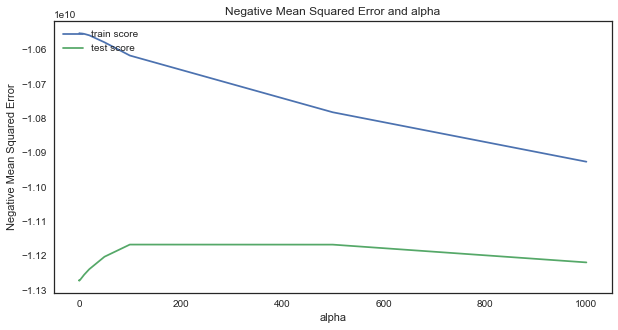

In [195]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(10,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_neg_mean_squared_error'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_neg_mean_squared_error'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title("Negative Mean Squared Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [196]:
alpha=100
lasso = Lasso(alpha=alpha)  
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [197]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
params_lasso=list(zip(cols, model_parameters))

In [198]:
arr_param = np.array(params_lasso)
arr_param_1= arr_param[:, 0]
arr_param_2=arr_param[:,1]

In [199]:
arr_param=pd.DataFrame(params_lasso)

In [200]:
df_param=arr_param.sort_values(by=[1],ascending=False)
df_param.head(5)

0           1
0   constant            237614.361
33  Jharkhand           49058.960 
16  Deg_before_DOJ      36455.965 
70  CollegeTier-1       32666.453 
50  JobCityTier-Tier_1  27818.039

In [201]:
df_param=arr_param.sort_values(by=[1],ascending=True)
df_param.head(5)

0          1
29  Gujarat      -44878.543
48  West Bengal  -44110.965
43  Tamil Nadu   -42448.939
18  GDP-constant -30347.412
1   Gender       -24216.412

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]), <a list of 72 Text xticklabel objects>)

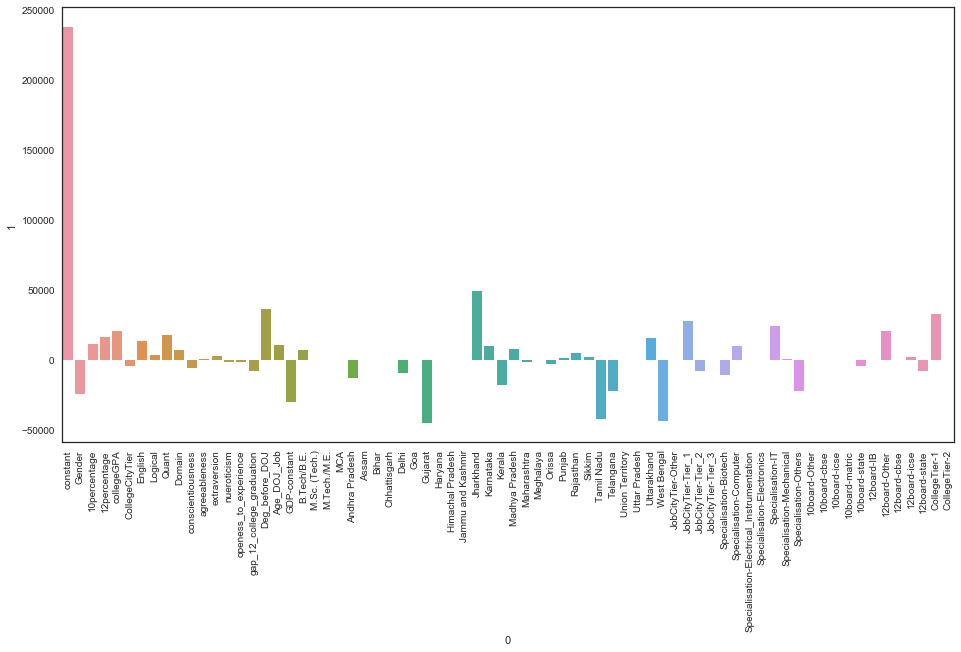

In [202]:
plt.figure(figsize=(16, 8))
sns.barplot(x=arr_param[0], y=arr_param[1],data=arr_param)
plt.xticks(rotation=90)

In [203]:
# prediction
y_pred_lasso = lasso.predict(X_test)

In [204]:
lasso_RMSE=sqrt(mean_squared_error(y_test,y_pred_lasso))
lasso_RMSE              

108097.60006198756

In [205]:
MAPE_Lasso=np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100
MAPE_Lasso

40.79236605276931

In [206]:
mean_absolute_error(y_test,y_pred_lasso)

84272.35796604521

Text(0.5,0,'Errors')

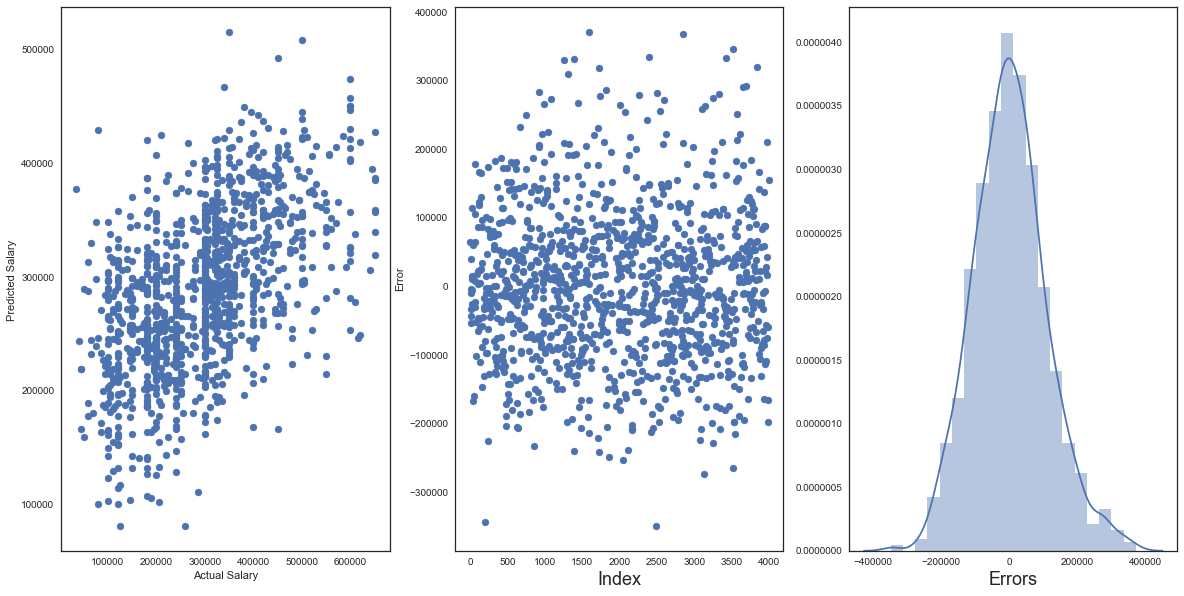

In [207]:

plt.figure(figsize = (20, 10))
plt.subplot(1,3,1)
plt.scatter(y_test,y_pred_lasso)
fig.suptitle('Actual  vs Predicted ', fontsize=20)              
plt.xlabel('Actual Salary')                          
plt.ylabel('Predicted Salary ')  
plt.subplot(1,3,2)
plt.scatter(y_test.index,(y_test - y_pred_lasso))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Index', fontsize = 18) 
plt.ylabel('Error')
plt.subplot(1,3,3)
sns.distplot((y_test - y_pred_lasso), bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Text(0,0.5,'Error')

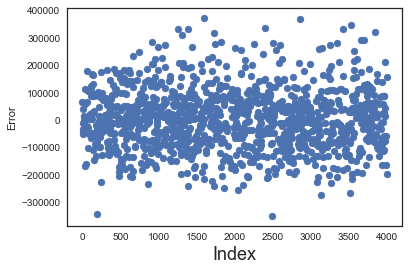

In [208]:
## Residual plot
plt.scatter(y_test.index,(y_test - y_pred_lasso))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Index', fontsize = 18) 
plt.ylabel('Error')

Text(0.5,0,'Errors')

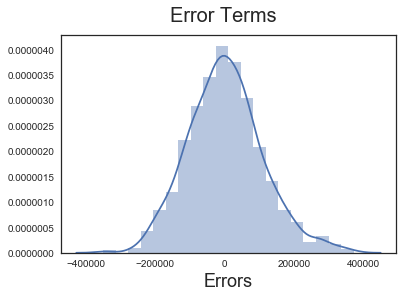

In [209]:
fig = plt.figure()
sns.distplot((y_test - y_pred_lasso), bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [210]:
col_lasso=arr_param.loc[(arr_param[1] > 0) | (arr_param[1] <0)]
col_lasso=col_lasso.loc[(col_lasso[0]!='constant')]

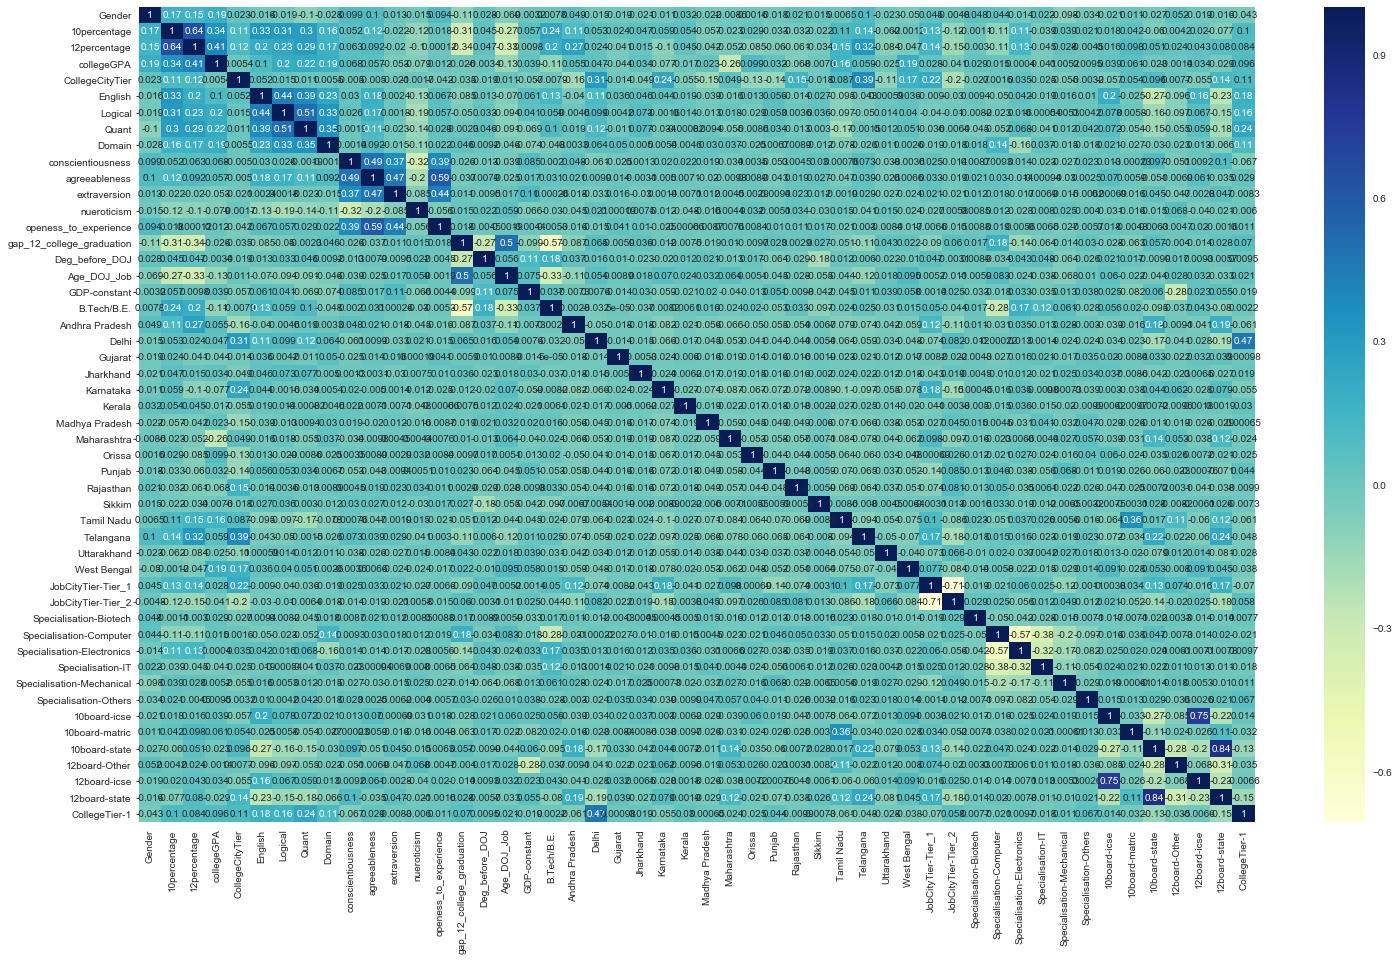

In [211]:
plt.figure(figsize = (25, 15))
sns.heatmap(X_train[col_lasso[0]].corr(), annot = True, cmap="YlGnBu")
plt.show()

### Non-parametric Modeling

### Build Model - SVR

In [212]:
from sklearn.svm import SVR
reg_SVR = SVR(kernel='rbf')
reg_SVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [213]:
y_pred_svr = reg_SVR.predict(X_test)

Text(0,0.5,'Predicted')

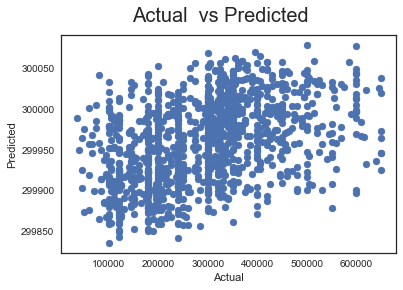

In [214]:
fig = plt.figure()
plt.scatter(y_test,y_pred_svr)
fig.suptitle('Actual  vs Predicted ', fontsize=20)              
plt.xlabel('Actual')                          
plt.ylabel('Predicted')

In [215]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# setting the range of hyperparameters
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
scoring_params=['neg_mean_absolute_error','neg_mean_squared_error']
# specify model
model = SVR(kernel="rbf")

# set up GridSearchCV()
model_cv_svr = GridSearchCV(estimator = model, 
                        n_jobs=3,
                        param_grid = hyper_params, 
                        scoring= scoring_params, 
                        refit='neg_mean_absolute_error',
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 
model_cv_svr.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   48.3s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:  1.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=3,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit='neg_mean_absolute_error',
             return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [216]:
cv_svr_results = pd.DataFrame(model_cv_svr.cv_results_)
cv_svr_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0   1.651254       0.222735      0.377584         0.105685        1        
1   1.360619       0.018478      0.279840         0.014344        1        
2   1.388804       0.040758      0.271044         0.005525        1        
3   1.380209       0.033267      0.289634         0.018182        10       
4   1.350226       0.021126      0.283638         0.011455        10       
5   1.373413       0.013519      0.277041         0.007490        10       
6   1.354623       0.026523      0.295831         0.025931        100      
7   1.370413       0.030704      0.274444         0.011300        100      
8   1.534720       0.121612      0.287034         0.014069        100      
9   1.540917       0.089686      0.287435         0.007278        1000     
10  1.472356       0.075696      0.267847         0.007559        1000     
11  1.419386       0.110886      0.280439         0.007083        1000     

   param_gamma                        params  \
0   0.01        {'C': 1, 'gamma': 0.01}        
1   0.001       {'C': 1, 'gamma': 0.001}       
2   0.0001      {'C': 1, 'gamma': 0.0001}      
3   0.01        {'C': 10, 'gamma': 0.01}       
4   0.001       {'C': 10, 'gamma': 0.001}      
5   0.0001      {'C': 10, 'gamma': 0.0001}     
6   0.01        {'C': 100, 'gamma': 0.01}      
7   0.001       {'C': 100, 'gamma': 0.001}     
8   0.0001      {'C': 100, 'gamma': 0.0001}    
9   0.01        {'C': 1000, 'gamma': 0.01}     
10  0.001       {'C': 1000, 'gamma': 0.001}    
11  0.0001      {'C': 1000, 'gamma': 0.0001}   

    split0_test_neg_mean_absolute_error  split1_test_neg_mean_absolute_error  \
0  -106109.793892                       -107334.513042                         
1  -106122.965077                       -107345.346196                         
2  -106124.990823                       -107347.070937                         
3  -105970.897179                       -107219.649729                         
4  -106102.591199                       -107327.986280                         
5  -106122.873830                       -107345.260447                         
6  -104592.468452                       -106082.111713                         
7  -105898.851067                       -107154.417712                         
8  -106101.683497                       -107327.128648                         
9  -95884.758479                        -98542.494389                          
10 -103907.296837                       -105458.885361                         
11 -105889.814457                       -107145.804970                         

    split2_test_neg_mean_absolute_error  split3_test_neg_mean_absolute_error  \
0  -98203.518828                        -104402.815078                         
1  -98216.000974                        -104415.907828                         
2  -98217.953559                        -104417.944650                         
3  -98071.563067                        -104264.514417                         
4  -98196.377877                        -104395.424249                         
5  -98215.909052                        -104415.813920                         
6  -96761.192778                        -102896.136098                         
7  -98000.148973                        -104190.606124                         
8  -98195.459373                        -104394.501962                         
9  -88382.664638                        -93834.632707                          
10 -96080.419233                        -102173.464538                         
11 -97990.941001                        -104181.442165                         

    split4_test_neg_mean_absolute_error  mean_test_neg_mean_absolute_error  \
0  -101257.645312                       -103461.657231                       
1  -101270.500862                       -103474.144187                       
2  -101272.494732                       -103476.090940                    

In [217]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv_svr.best_score_
best_hyperparams = model_cv_svr.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is -93564.77274915378 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


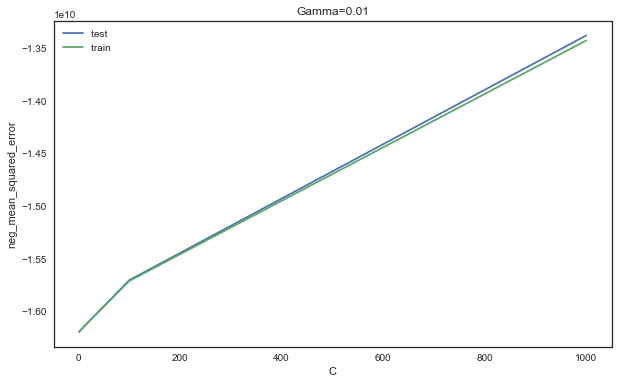

In [218]:
plt.figure(figsize=(10,6))
gamma_01 = cv_svr_results[cv_svr_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_train_neg_mean_squared_error"])
plt.plot(gamma_01["param_C"], gamma_01["mean_test_neg_mean_squared_error"])
plt.xlabel('C')
plt.ylabel('neg_mean_squared_error')
plt.title("Gamma=0.01")
plt.legend(['test ', 'train '], loc='upper left')


In [219]:
reg_svr = SVR(C=1000, gamma=0.01, kernel="rbf")

reg_svr.fit(X_train, y_train)
y_pred_svr = reg_svr.predict(X_test)

In [220]:
SVR_RMSE=sqrt(mean_squared_error(y_test,y_pred_svr))
SVR_RMSE              

118026.89561400865

In [221]:
MAPE_SVR=np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100
MAPE_SVR

45.0866976645111

In [222]:
mean_absolute_error(y_test,y_pred_svr)

92382.77468073521

Text(0,0.5,'Predicted')

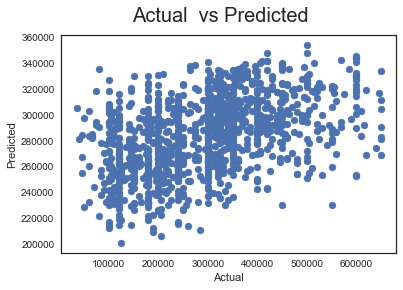

In [223]:
fig = plt.figure()
plt.scatter(y_test,y_pred_svr)
fig.suptitle('Actual  vs Predicted ', fontsize=20)              
plt.xlabel('Actual')                          
plt.ylabel('Predicted')